<a href="https://colab.research.google.com/github/fabianhuertas1992/DatosML/blob/main/Machine%20Learning/ML_Parcelas(entrenamiento).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este código compara tres modelos de machine learning para predecir la **biomasa (Mg/ha)** usando un conjunto de características como el **NDVI**, diámetro a la altura del pecho (DAP), altura del árbol y combinaciones derivadas de estos datos. Los tres modelos evaluados son:

1. **XGBoost**
2. **Regresión Lineal**
3. **Random Forest**


**Conclusión**:

Todos los modelos fallan en predecir la biomasa de manera efectiva. Esto podría deberse a problemas en los datos (como falta de suficiente variabilidad o errores en los datos de entrada).

**Podría ser necesario probar con más datos y técnicas de preprocesamiento para mejorar los resultados.**

## Librerias y Conexión con Datos

In [ ]:
# @title Instalacion de librerias
!pip install rasterio
!pip install SQLAlchemy aiomysql
!pip install geopandas
!pip install folium
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 239.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 8.1 MB/s eta 0:00:00


In [ ]:
# @title Montar acceso Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title Conectar con DB de Kobo
#Importa los datos de KOBOTOOLS y crea un DF
#Archivo KOBO aplicacion
import pandas as pd

# URL del archivo CSV generado por KoboToolbox
url = "https://kf.kobotoolbox.org/api/v2/assets/a44ciRM8GHh5XHyJu4XEKn/export-settings/esprBMMCYyNhWz6bF8YKTqy/data.csv"  # Reemplaza con la URL real del archivo CSV

# Leer el archivo CSV usando pandas con delimitador de punto y coma
df = pd.read_csv(url, delimiter=';')
df

,"El Ministerio de Ciencia, Tecnología e Innovación, a través del Sistema General de Regalías (SGR), viabilizó, priorizó y aprobó el proyecto BPIN 2022000100005 denominado “Implementación de acciones para la protección de cuencas de agua y suelos a partir de reforestación con tecnologías emergentes y biotecnología en la región llanos orientales en los departamentos de Meta y Arauca”, designando como entidad ejecutora a la UNIVERSIDAD COOPERATIVA DE COLOMBIA, identificada con NIT 860.029.924-7 y designada como co-ejecutorora a la CORPORACION INNPRENDE identificada con NIT 901243061-0. En el proceso de ejecución del proyecto, adelantamos consultas relacionadas con el mismo, como el formulario que se presenta a continuación:\nEste formulario facilita el protocolo de caracterización de las especies del bosque",Seleccione el nombre de su proyecto en Plataforma,Diligenciado por,ID Conglomerado,Fecha de diligenciamiento,ID Subparcela,No ID individuo,Seleccione la categoría por tamaño del individuo,Foto de la identificación del árbol,Foto de la identificación del árbol_URL,...,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags,_index
0,NaN,ELTESORODEBREMEN,Jose Quiñones,3,2023-05-22,3,NaN,Fustales Grandes (DAP ≥ 30 cm),IMG_20230522_103221_465-10_32_45-9_52_57.webp,https://kc.kobotoolbox.org/media/original?medi...,...,241886028,fa2fb73e-4199-450f-ae55-840994aa24c1,2023-05-29 14:54:52,NaN,NaN,submitted_via_web,NaN,vP79Ps3bBNoBCBpSuJFkcq,NaN,1
1,NaN,El Aguador,Sebastian Plata,1,2023-05-15,1,1.0,Fustales (30 cm > DAP ≥ 10 cm),1684163266955-10_1_7.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,241886878,7b354705-ad2f-490b-855d-ac7b63d075b1,2023-05-29 14:56:48,NaN,NaN,submitted_via_web,suanblockchain,vP79Ps3bBNoBCBpSuJFkcq,NaN,2
2,NaN,El Aguador,Sebastian Plata,1,2023-05-15,1,8.0,Fustales (30 cm > DAP ≥ 10 cm),1684166403215-19_49_16.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,241992703,8de91169-a043-4cf2-9518-11c5dc8c7910,2023-05-30 00:51:46,NaN,NaN,submitted_via_web,moxie,vP79Ps3bBNoBCBpSuJFkcq,NaN,3
3,NaN,El Aguador,Sebastian Plata,1,2023-05-15,1,6.0,Fustales Grandes (DAP ≥ 30 cm),1684165653222-18_50_25.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,242623494,382bb858-4fbe-4333-bab7-0a78c284b340,2023-05-31 23:51:41,NaN,NaN,submitted_via_web,suanblockchain,vP79Ps3bBNoBCBpSuJFkcq,NaN,4
4,NaN,El Aguador,Sebastian Plata,1,2023-05-15,1,2.0,Fustales (30 cm > DAP ≥ 10 cm),1684163686851-18_53_45.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,242623797,a6efa90a-3ef0-4984-91f8-60c03085a367,2023-05-31 23:55:28,NaN,NaN,submitted_via_web,suanblockchain,vP79Ps3bBNoBCBpSuJFkcq,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,NaN,ACAP ALABANIA PROYECTO VJOSE-NARTE A/R,Jhony López,1,2024-08-22,4,409.0,Fustales Grandes (DAP ≥ 30 cm),image-16_55_51.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,374834627,76b2b49f-32fd-4bef-bff3-820355f3c3a9,2024-08-23 12:23:59,NaN,NaN,submitted_via_web,NaN,v8zoTcwyYNqhruKiGTxepa,NaN,524
524,NaN,ACAP ALABANIA PROYECTO VJOSE-NARTE A/R,Carlos soto,1,2024-08-22,3,405.0,Fustales (30 cm > DAP ≥ 10 cm),image-16_48_18.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,374906505,15a81e26-e569-46a2-912b-105e482ff52e,2024-08-23 15:19:03,NaN,NaN,submitted_via_web,NaN,v8zoTcwyYNqhruKiGTxepa,NaN,525
525,NaN,ACAP ALABANIA PROYECTO VJOSE-NARTE A/R,Carlos Soto,1,2024-08-22,3,407.0,Fustales (30 cm > DAP ≥ 10 cm),image-16_51_19.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,374906742,eb663ad0-9118-4990-b1bb-1ca9b064a6e8,2024-08-23 15:19:40,NaN,NaN,submitted_via_web,NaN,v8zoTcwyYNqhruKiGTxepa,NaN,526
526,NaN,ACAP ALABANIA PROYECTO VJOSE-NARTE A/R,Carlos Soto,1,2024-08-22,3,408.0,Fustales (30 cm > DAP ≥ 10 cm),image-16_54_25.jpg,https://kc.kobotoolbox.org/media/original?medi...,...,374908049,921ebfc9-96ec-4a34-9def-427b9bb64737,2024-08-23 15:23:16,NaN,NaN,submitted_via_web,NaN,v8z

In [ ]:
# @title Seleccionar únicamente las columnas de ubicación
df_filtered = df[['ID Subparcela','Ubicación GPS','_Ubicación GPS_latitude', '_Ubicación GPS_longitude','_Ubicación GPS_altitude','_Ubicación GPS_precision',
                  'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt','Azimut','Distancia',
                  'Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.)',
                  'HT altura del árbol o del fuste 1 (mt)']]
df_filtered

,ID Subparcela,Ubicación GPS,_Ubicación GPS_latitude,_Ubicación GPS_longitude,_Ubicación GPS_altitude,_Ubicación GPS_precision,"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",Azimut,Distancia,Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),HT altura del árbol o del fuste 1 (mt)
0,3,4.691352 -75.658101 1799.1 10.199999809265137,4.691352,-75.658101,1799.100000,10.200000,39.0,0.0,0,NaN,15
1,1,4.9317239 -75.0297909 1411.7 3.9000000953674316,4.931724,-75.029791,1411.700000,3.900000,12.0,0.0,0,NaN,3
2,1,4.93175 -75.0297246 1419 4.328999996185303,4.931750,-75.029725,1419.000000,4.329000,18.2,NaN,NaN,NaN,2.5
3,1,4.93183 -75.0297517 1419.2 3.9000000953674316,4.931830,-75.029752,1419.200000,3.900000,97.4,NaN,NaN,NaN,12
4,1,4.931775 -75.029688 1431.1000000000001 3.90000...,4.931775,-75.029688,1431.100000,3.900000,24.0,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...
523,4,6.595624 -71.693078 246.48771116137505 7.95790...,6.595624,-71.693078,246.487711,7.957906,44.0,26.0,12,NaN,12
524,3,6.595554 -71.693022 247.75863822136324 21.9344...,6.595554,-71.693022,247.758638,21.934445,15.0,NaN,11,NaN,12
525,3,6.595554 -71.693022 247.75863822136324 21.9344...,6.595554,-71.693022,247.758638,21.934445,15.0,NaN,11,NaN,15
526,3,6.595554 -71.693022 247.75863822136324 21.9344...,6.595554,-71.693022,247.758638,21.934445,22.0,NaN,1,NaN,15


In [ ]:
# @title total de nulos NAN
df_filtered.isna().sum()

,0
ID Subparcela,0
Ubicación GPS,260
_Ubicación GPS_latitude,260
_Ubicación GPS_longitude,260
_Ubicación GPS_altitude,260
_Ubicación GPS_precision,260
"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",35
Azimut,273
Distancia,265
Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),528


In [ ]:
# @title Reemplaza nulos por ceros
df_filtered = df_filtered.fillna(0)
df.update(df_filtered)
df_filtered.isna().sum()

,0
ID Subparcela,0
Ubicación GPS,0
_Ubicación GPS_latitude,0
_Ubicación GPS_longitude,0
_Ubicación GPS_altitude,0
_Ubicación GPS_precision,0
"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",0
Azimut,0
Distancia,0
Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),0


In [ ]:
data = df_filtered

In [ ]:
data.columns

Index(['ID Subparcela', 'Ubicación GPS', '_Ubicación GPS_latitude',
       '_Ubicación GPS_longitude', '_Ubicación GPS_altitude',
       '_Ubicación GPS_precision',
       'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt',
       'Azimut', 'Distancia',
       'Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.)',
       'HT altura del árbol o del fuste 1 (mt)'],
      dtype='object')

# Cálculo Biomasa Datos Kobo

In [ ]:
# @title  Biomasa registros
import numpy as np

def calcular_biomasa(dap, densidad=0.534):
    # Verifica que los valores no sean nulos o incorrectos
    if pd.isnull(dap) or dap <= 0:
        return np.nan

    # Calcula la biomasa usando la fórmula
    ln_biomasa = 3.652 - 1.697 * np.log(dap) + 1.169 * (np.log(dap))**2 - 0.122 * (np.log(dap))**3 + 1.285 * np.log(densidad)
    biomasa = np.exp(ln_biomasa)
    return biomasa

    # La columna de DAP se llama 'Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt'
data['Biomasa (kg)'] = data['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt'].apply(calcular_biomasa)

biomasa_total = data['Biomasa (kg)'].sum()
print(f'Biomasa total: {biomasa_total:.2f} kg')
data

Biomasa total: 91527.91 kg


,ID Subparcela,Ubicación GPS,_Ubicación GPS_latitude,_Ubicación GPS_longitude,_Ubicación GPS_altitude,_Ubicación GPS_precision,"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",Azimut,Distancia,Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),HT altura del árbol o del fuste 1 (mt),Biomasa (kg)
0,3,4.691352 -75.658101 1799.1 10.199999809265137,4.691352,-75.658101,1799.100000,10.200000,39.0,0.0,0,0.0,15,555.487004
1,1,4.9317239 -75.0297909 1411.7 3.9000000953674316,4.931724,-75.029791,1411.700000,3.900000,12.0,0.0,0,0.0,3,53.267172
2,1,4.93175 -75.0297246 1419 4.328999996185303,4.931750,-75.029725,1419.000000,4.329000,18.2,0.0,0,0.0,2.5,119.489181
3,1,4.93183 -75.0297517 1419.2 3.9000000953674316,4.931830,-75.029752,1419.200000,3.900000,97.4,0.0,0,0.0,12,2624.525247
4,1,4.931775 -75.029688 1431.1000000000001 3.90000...,4.931775,-75.029688,1431.100000,3.900000,24.0,0.0,0,0.0,6,209.266439
...,...,...,...,...,...,...,...,...,...,...,...,...
523,4,6.595624 -71.693078 246.48771116137505 7.95790...,6.595624,-71.693078,246.487711,7.957906,44.0,26.0,12,0.0,12,701.406182
524,3,6.595554 -71.693022 247.75863822136324 21.9344...,6.595554,-71.693022,247.758638,21.934445,15.0,0.0,11,0.0,12,81.476629
525,3,6.595554 -71.693022 247.75863822136324 21.9344...,6.595554,-71.693022,247.758638,21.934445,15.0,0.0,11,0.0,15,81.476629
526,3,6.595554 -71.693022 247.75863822136324 21.9344...,6.595554,-71.693022,247.758638,21.934445,22.0,0.0,1,0.0,15,175.303444


In [ ]:
# @title Cálculo de Biomasa del los puntos dentro del polígono
import requests
import folium
from shapely.geometry import shape, Point
from shapely.ops import transform
from pyproj import Transformer
from IPython.display import IFrame
import pandas as pd
import numpy as np

# Función para calcular la biomasa
def calcular_biomasa(dap, densidad=0.534):
    if pd.isnull(dap) or dap <= 0:
        return np.nan
    ln_biomasa = 3.652 - 1.697 * np.log(dap) + 1.169 * (np.log(dap))**2 - 0.122 * (np.log(dap))**3 + 1.285 * np.log(densidad)
    biomasa = np.exp(ln_biomasa)
    return biomasa

# Función para obtener el polígono basado en coordenadas
def obtener_poligono_por_geometria(lat, lon, radio=10):
    BASE_URL = "https://services2.arcgis.com/RVvWzU3lgJISqdke/ArcGIS/rest/services/CATASTRO_PUBLICO_Junio_30_2024/FeatureServer/"
    tableNumber = 14
    COMMAND = "query"

    query = {
        'geometry': f"{lon},{lat}",
        'geometryType': 'esriGeometryPoint',
        'inSR': '4326',
        'spatialRel': 'esriSpatialRelIntersects',
        'distance': radio,
        'units': 'esriSRUnit_Meter',
        'returnGeometry': 'true',
        'outFields': '*',
        'f': 'geojson',
        'resultRecordCount': 1
    }

    URL = f"{BASE_URL}/{tableNumber}/{COMMAND}"
    response = requests.get(URL, params=query)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Cargar los datos y calcular la biomasa
data['Biomasa (kg)'] = data['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt'].apply(calcular_biomasa)

# Definir la ID Catastral objetivo
id_catastral_objetivo = '632720000000000010644000000000'
poligono_encontrado = None

# Iterar sobre las filas del DataFrame para buscar el polígono de la ID Catastral específica
for idx, row in data.iterrows():
    lat = row['_Ubicación GPS_latitude']
    lon = row['_Ubicación GPS_longitude']

    resultado = obtener_poligono_por_geometria(lat, lon)
    if resultado and resultado['features']:
        for feature in resultado['features']:
            id_catastral = feature['properties'].get('CODIGO')
            if id_catastral == id_catastral_objetivo:
                poligono_encontrado = feature['geometry']
                break
    if poligono_encontrado:
        break

# Verificar si se encontró el polígono y calcular el área en hectáreas
if poligono_encontrado:
    # Convertir la geometría del polígono a objeto Shapely
    poligono_principal = shape(poligono_encontrado)

    # Transformar las coordenadas geográficas (EPSG:4326) a un sistema métrico (EPSG:3857)
    transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
    poligono_transformado = transform(transformer.transform, poligono_principal)

    # Calcular el área del polígono transformado en metros cuadrados y convertir a hectáreas
    area_poligono_principal_m2 = poligono_transformado.area
    area_poligono_principal_ha = area_poligono_principal_m2 / 10000  # Convertir de m² a hectáreas

    # Filtrar subparcelas que caen dentro del polígono
    subparcelas_filtradas = data[data.apply(lambda row: poligono_principal.contains(Point(row['_Ubicación GPS_longitude'], row['_Ubicación GPS_latitude'])), axis=1)]

    # Crear un DataFrame con los datos filtrados
    dataframe_filtrado = pd.DataFrame(subparcelas_filtradas)

    # Calcular la biomasa total sumando todas las subparcelas
    biomasa_total_kg = dataframe_filtrado['Biomasa (kg)'].sum()

    # Calcular el área total estimada de subparcelas
    radio = 15  # Radio en metros
    area_subparcela_m2 = np.pi * (radio ** 2)
    area_total_subparcelas_m2 = area_subparcela_m2 * len(dataframe_filtrado)
    area_total_subparcelas_ha = area_total_subparcelas_m2 / 10000  # Convertir de m² a hectáreas

    # Convertir la biomasa de kg a megagramos (Mg) y luego a Mg/ha para el área total
    biomasa_total_mg = biomasa_total_kg / 1000  # Convertir kg a Mg
    biomasa_total_mg_ha = biomasa_total_mg / area_total_subparcelas_ha  # Convertir a Mg/ha

    # Crear un mapa centrado en la primera ubicación encontrada
    lat_central = dataframe_filtrado['_Ubicación GPS_latitude'].mean()
    lon_central = dataframe_filtrado['_Ubicación GPS_longitude'].mean()
    mapa = folium.Map(location=[lat_central, lon_central], zoom_start=15)

    # Agregar el polígono principal al mapa
    folium.GeoJson(poligono_principal, name=f"ID: {id_catastral_objetivo}").add_to(mapa)

    # Convertir el radio de 15 metros a grados aproximadamente para el uso en el mapa
    METROS_A_GRADOS = 1 / 111320
    radio_en_grados = radio * METROS_A_GRADOS

    # Agregar los círculos al mapa y mostrar la información
    for _, subparcela in dataframe_filtrado.iterrows():
        lat = subparcela['_Ubicación GPS_latitude']
        lon = subparcela['_Ubicación GPS_longitude']

        # Dibujar un círculo de 15 metros de radio en el punto central
        folium.Circle(
            location=(lat, lon),
            radius=radio,  # Radio en metros para la visualización
            color='blue',
            fill=True,
            fill_opacity=0.3
        ).add_to(mapa)

    # Mostrar el área total del polígono principal en hectáreas
    print(f"Área total del polígono principal: {area_poligono_principal_ha:.4f} hectáreas")
    print(f"Biomasa Total: {biomasa_total_kg:.2f} kg")
    print(f"Biomasa Total (Mg/ha): {biomasa_total_mg_ha:.2f} Mg/ha")

    # Guardar y mostrar el mapa en Google Colab
    mapa.save("mapa_subparcelas.html")
    display(IFrame("mapa_subparcelas.html", width=700, height=500))

    # Mostrar el DataFrame con los resultados filtrados
    display(dataframe_filtrado)

Área total del polígono principal: 16.9846 hectáreas
Biomasa Total: 26867.40 kg
Biomasa Total (Mg/ha): 1.60 Mg/ha


,ID Subparcela,Ubicación GPS,_Ubicación GPS_latitude,_Ubicación GPS_longitude,_Ubicación GPS_altitude,_Ubicación GPS_precision,"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",Azimut,Distancia,Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),HT altura del árbol o del fuste 1 (mt),Biomasa (kg)
0,3,4.691352 -75.658101 1799.1 10.199999809265137,4.691352,-75.658101,1799.1,10.2,39.00,0.0,0,0.0,15,555.487004
8,2,4.6910075 -75.6574188 1824 0,4.691008,-75.657419,1824.0,0.0,18.27,217.0,3 m,0.0,6m,120.412802
9,2,4.69102793 -75.65742622 1835 1,4.691028,-75.657426,1835.0,1.0,18.60,72.0,2.50 m,0.0,6.88 m,124.820105
10,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,8.33,62.0,3.50,0.0,6.5,28.205152
11,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,3.80,62.0,4,0.0,2.30,10.734888
...,...,...,...,...,...,...,...,...,...,...,...,...
448,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.25,331.0,17,0.0,7,14.731296
449,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,7.32,327.0,17.5,0.0,8,23.049784
450,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,6.49,327.0,17,0.0,7,19.354264
451,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.72,325.0,18,0.0,8,16.356897


In [ ]:
# @title Exportar archivo csv
from google.colab import files

dataframe_filtrado.to_csv('dataframe_filtrado.csv',  index=False,
          sep=';',
          encoding='utf-8',
          decimal=',')
files.download('dataframe_filtrado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# @title Convertir columna altura
import pandas as pd
import numpy as np

dataframe_filtrado = dataframe_filtrado

HT_altura  = dataframe_filtrado['HT altura del árbol o del fuste 1 (mt)']

# Función para eliminar letras y caracteres no numéricos, excepto puntos y comas para decimales
def eliminar_letras_y_convertir(valor):
    try:
        # Convertir a string y eliminar letras, dejando solo números y punto/coma para decimales
        valor_str = str(valor).lower().replace('m', '').strip()  # Eliminar la 'm' y espacios
        valor_str = valor_str.replace(',', '.')  # Reemplazar coma por punto (formato decimal)

        # Convertir a float
        return float(valor_str)
    except ValueError:
        return np.nan  # O asignar un valor por defecto si lo prefieres

# Aplicar la función a toda la columna
HT_altura = HT_altura.apply(eliminar_letras_y_convertir)

# Asignar de nuevo la columna procesada al DataFrame
dataframe_filtrado['HT altura del árbol o del fuste 1 (mt)'] = HT_altura

# Mostrar el DataFrame final
dataframe_filtrado
dataframe_filtrado

,ID Subparcela,Ubicación GPS,_Ubicación GPS_latitude,_Ubicación GPS_longitude,_Ubicación GPS_altitude,_Ubicación GPS_precision,"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",Azimut,Distancia,Distancia Altura (Se registra la distancia horizontal desde el sitio donde se pueda visualizar tanto el ápice del árbol como su base.),HT altura del árbol o del fuste 1 (mt),Biomasa (kg)
0,3,4.691352 -75.658101 1799.1 10.199999809265137,4.691352,-75.658101,1799.1,10.2,39.00,0.0,0,0.0,15.00,555.487004
8,2,4.6910075 -75.6574188 1824 0,4.691008,-75.657419,1824.0,0.0,18.27,217.0,3 m,0.0,6.00,120.412802
9,2,4.69102793 -75.65742622 1835 1,4.691028,-75.657426,1835.0,1.0,18.60,72.0,2.50 m,0.0,6.88,124.820105
10,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,8.33,62.0,3.50,0.0,6.50,28.205152
11,2,4.69102793 -75.65742622 1835 0,4.691028,-75.657426,1835.0,0.0,3.80,62.0,4,0.0,2.30,10.734888
...,...,...,...,...,...,...,...,...,...,...,...,...
448,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.25,331.0,17,0.0,7.00,14.731296
449,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,7.32,327.0,17.5,0.0,8.00,23.049784
450,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,6.49,327.0,17,0.0,7.00,19.354264
451,2,4.691011 -75.657555 1825 0,4.691011,-75.657555,1825.0,0.0,5.72,325.0,18,0.0,8.00,16.356897


In [ ]:
# @title Agrupar parcelas y calculo biomasa a mg/ha
import requests
import folium
from shapely.geometry import shape, Point
from shapely.ops import transform
from pyproj import Transformer
from IPython.display import IFrame
import pandas as pd
import numpy as np

# Función para calcular la biomasa
def calcular_biomasa(dap, densidad=0.534):
    if pd.isnull(dap) or dap <= 0:
        return np.nan
    ln_biomasa = 3.652 - 1.697 * np.log(dap) + 1.169 * (np.log(dap))**2 - 0.122 * (np.log(dap))**3 + 1.285 * np.log(densidad)
    biomasa = np.exp(ln_biomasa)
    return biomasa

# Función para obtener el polígono basado en coordenadas
def obtener_poligono_por_geometria(lat, lon, radio=10):
    BASE_URL = "https://services2.arcgis.com/RVvWzU3lgJISqdke/ArcGIS/rest/services/CATASTRO_PUBLICO_Junio_30_2024/FeatureServer/"
    tableNumber = 14
    COMMAND = "query"

    query = {
        'geometry': f"{lon},{lat}",
        'geometryType': 'esriGeometryPoint',
        'inSR': '4326',
        'spatialRel': 'esriSpatialRelIntersects',
        'distance': radio,
        'units': 'esriSRUnit_Meter',
        'returnGeometry': 'true',
        'outFields': '*',
        'f': 'geojson',
        'resultRecordCount': 1
    }

    URL = f"{BASE_URL}/{tableNumber}/{COMMAND}"
    response = requests.get(URL, params=query)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Cargar los datos y calcular la biomasa
data['Biomasa (kg)'] = data['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt'].apply(calcular_biomasa)

# Definir la ID Catastral objetivo
id_catastral_objetivo = '632720000000000010644000000000'
poligono_encontrado = None

# Iterar sobre las filas del DataFrame para buscar el polígono de la ID Catastral específica
for idx, row in data.iterrows():
    lat = row['_Ubicación GPS_latitude']
    lon = row['_Ubicación GPS_longitude']

    resultado = obtener_poligono_por_geometria(lat, lon)
    if resultado and resultado['features']:
        for feature in resultado['features']:
            id_catastral = feature['properties'].get('CODIGO')
            if id_catastral == id_catastral_objetivo:
                poligono_encontrado = feature['geometry']
                break
    if poligono_encontrado:
        break

# Verificar si se encontró el polígono y calcular el área en hectáreas
if poligono_encontrado:
    # Convertir la geometría del polígono a objeto Shapely
    poligono_principal = shape(poligono_encontrado)

    # Transformar las coordenadas geográficas (EPSG:4326) a un sistema métrico (EPSG:3857)
    transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
    poligono_transformado = transform(transformer.transform, poligono_principal)

    # Calcular el área del polígono transformado en metros cuadrados y convertir a hectáreas
    area_poligono_principal_m2 = poligono_transformado.area
    area_poligono_principal_ha = area_poligono_principal_m2 / 10000  # Convertir de m² a hectáreas

    # Filtrar subparcelas que caen dentro del polígono
    subparcelas = data[data.apply(lambda row: poligono_principal.contains(Point(row['_Ubicación GPS_longitude'], row['_Ubicación GPS_latitude'])), axis=1)]

    # Crear un mapa centrado en la primera ubicación encontrada
    lat_central = subparcelas['_Ubicación GPS_latitude'].mean()
    lon_central = subparcelas['_Ubicación GPS_longitude'].mean()
    mapa = folium.Map(location=[lat_central, lon_central], zoom_start=15)

    # Agregar el polígono principal al mapa
    folium.GeoJson(poligono_principal, name=f"ID: {id_catastral_objetivo}").add_to(mapa)

    # Agrupar subparcelas por 'ID Subparcela' y calcular el punto central
    dataframe = subparcelas.groupby('ID Subparcela').agg({
        '_Ubicación GPS_latitude': 'mean',
        '_Ubicación GPS_longitude': 'mean',
        'Biomasa (kg)': 'sum',
        'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt': lambda x: pd.to_numeric(x, errors='coerce').mean(),
        'HT altura del árbol o del fuste 1 (mt)': lambda x: pd.to_numeric(x, errors='coerce').mean() # Convert to numeric before calculating the mean
    }).reset_index()

    # Calcular el área del círculo (15 m de radio) para cada subparcela
    radio = 15  # Radio en metros
    dataframe['Area (m²)'] = np.pi * (radio ** 2)
    dataframe['Area (ha)'] = dataframe['Area (m²)'] / 10000  # Convertir de m² a hectáreas

    # Convertir la biomasa de kg a megagramos (Mg) y luego a Mg/ha
    dataframe['Biomasa (Mg)'] = dataframe['Biomasa (kg)'] / 1000  # Convertir kg a Mg
    dataframe['Biomasa (Mg/ha)'] = dataframe['Biomasa (Mg)'] / dataframe['Area (ha)']  # Convertir a Mg/ha

    # Convertir el radio de 15 metros a grados aproximadamente para el uso en el mapa
    METROS_A_GRADOS = 1 / 111320
    radio_en_grados = radio * METROS_A_GRADOS

    # Agregar los círculos al mapa y mostrar la información
    for _, subparcela in dataframe.iterrows():
        lat = subparcela['_Ubicación GPS_latitude']
        lon = subparcela['_Ubicación GPS_longitude']

        # Dibujar un círculo de 15 metros de radio en el punto central
        folium.Circle(
            location=(lat, lon),
            radius=radio,  # Radio en metros para la visualización
            color='blue',
            fill=True,
            fill_opacity=0.3
        ).add_to(mapa)

        # Agregar un marcador con la información de la subparcela
        folium.Marker(
            location=[lat, lon],
            popup=f"IDSubparcela: {subparcela['ID Subparcela']}<br>Biomasa Total: {subparcela['Biomasa (kg)']:.2f} kg<br>Área: {subparcela['Area (m²)']:.2f} m²<br>Biomasa (Mg/ha): {subparcela['Biomasa (Mg/ha)']:.2f} Mg/ha",
            icon=folium.Icon(color='green', icon='info-sign')
        ).add_to(mapa)

    # Mostrar el área total del polígono principal en hectáreas
    print(f"Área total del polígono principal: {area_poligono_principal_ha:.4f} hectáreas")

    # Guardar y mostrar el mapa en Google Colab
    mapa.save("mapa_subparcelas.html")
    display(IFrame("mapa_subparcelas.html", width=700, height=500))

    # Agregar el área del polígono principal al DataFrame
    #dataframe['Area Total Polígono Principal (ha)'] = area_poligono_principal_ha

# Mostrar el DataFrame con los resultados calculados
display(dataframe)


Área total del polígono principal: 16.9846 hectáreas


,ID Subparcela,_Ubicación GPS_latitude,_Ubicación GPS_longitude,Biomasa (kg),"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",HT altura del árbol o del fuste 1 (mt),Area (m²),Area (ha),Biomasa (Mg),Biomasa (Mg/ha)
0,1,4.690977,-75.658019,4912.348264,12.420664,5.742553,706.858347,0.070686,4.912348,69.495512
1,2,4.691029,-75.657437,11291.388977,12.743333,4.933905,706.858347,0.070686,11.291389,159.740477
2,3,4.691352,-75.658101,555.487004,39.000000,15.000000,706.858347,0.070686,0.555487,7.858534
3,4,4.691530,-75.656770,5184.567362,17.625278,11.180556,706.858347,0.070686,5.184567,73.346624
4,5,4.691135,-75.656140,4923.611276,14.536364,7.372093,706.858347,0.070686,4.923611,69.654851


In [ ]:
dataframe_filtrado = dataframe.copy(deep=True)
dataframe_filtrado

,ID Subparcela,_Ubicación GPS_latitude,_Ubicación GPS_longitude,Biomasa (kg),"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",HT altura del árbol o del fuste 1 (mt),Area (m²),Area (ha),Biomasa (Mg),Biomasa (Mg/ha)
0,1,4.690977,-75.658019,4912.348264,12.420664,5.742553,706.858347,0.070686,4.912348,69.495512
1,2,4.691029,-75.657437,11291.388977,12.743333,4.933905,706.858347,0.070686,11.291389,159.740477
2,3,4.691352,-75.658101,555.487004,39.000000,15.000000,706.858347,0.070686,0.555487,7.858534
3,4,4.691530,-75.656770,5184.567362,17.625278,11.180556,706.858347,0.070686,5.184567,73.346624
4,5,4.691135,-75.656140,4923.611276,14.536364,7.372093,706.858347,0.070686,4.923611,69.654851


In [ ]:
# @title Reemplaza nulos por ceros
dataframe_filtrado = dataframe_filtrado.fillna(0)
dataframe_filtrado.update(dataframe_filtrado)
dataframe_filtrado.isna().sum()

,0
ID Subparcela,0
_Ubicación GPS_latitude,0
_Ubicación GPS_longitude,0
Biomasa (kg),0
"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",0
HT altura del árbol o del fuste 1 (mt),0
Area (m²),0
Area (ha),0
Biomasa (Mg),0
Biomasa (Mg/ha),0


# Cálculo NDVI en coordenadas

In [ ]:
dataframemg = dataframe_filtrado.copy(deep=True)
dataframemg

,ID Subparcela,_Ubicación GPS_latitude,_Ubicación GPS_longitude,Biomasa (kg),"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",HT altura del árbol o del fuste 1 (mt),Area (m²),Area (ha),Biomasa (Mg),Biomasa (Mg/ha)
0,1,4.690977,-75.658019,4912.348264,12.420664,5.742553,706.858347,0.070686,4.912348,69.495512
1,2,4.691029,-75.657437,11291.388977,12.743333,4.933905,706.858347,0.070686,11.291389,159.740477
2,3,4.691352,-75.658101,555.487004,39.000000,15.000000,706.858347,0.070686,0.555487,7.858534
3,4,4.691530,-75.656770,5184.567362,17.625278,11.180556,706.858347,0.070686,5.184567,73.346624
4,5,4.691135,-75.656140,4923.611276,14.536364,7.372093,706.858347,0.070686,4.923611,69.654851


In [ ]:
# @title Calculo Sentinel NDVI en coordenadas específicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import rasterio


def process_image(multiband_path, nir_band_idx, red_band_idx, corrections):
    with rasterio.open(multiband_path) as src:
        banda_NIR = src.read(nir_band_idx).astype('float32')
        banda_roja = src.read(red_band_idx).astype('float32')
        transform = src.transform

    mascara = (banda_roja > 0) & (banda_NIR > 0)
    banda_roja_masked = np.ma.array(banda_roja, mask=~mascara)
    banda_NIR_masked = np.ma.array(banda_NIR, mask=~mascara)

    if 'normalization' in corrections:
        banda_NIR_normalized = banda_NIR_masked / banda_NIR_masked.max()
        banda_roja_normalized = banda_roja_masked / banda_roja_masked.max()
    else:
        banda_NIR_normalized = banda_NIR_masked
        banda_roja_normalized = banda_roja_masked

    if 'radiance_conversion' in corrections:
        def convert_to_radiance(dn, gain, bias):
            return gain * dn + bias

        gain_nir = 0.0001
        bias_nir = 0.0
        gain_red = 0.0001
        bias_red = 0.0

        nir_radiance = convert_to_radiance(banda_NIR_normalized, gain_nir, bias_nir)
        red_radiance = convert_to_radiance(banda_roja_normalized, gain_red, bias_red)
    else:
        nir_radiance = banda_NIR_normalized
        red_radiance = banda_roja_normalized

    if 'topographic_correction' in corrections:
        def topographic_correction(LT, z, i, m, b):
            C = m / b
            z_rad = np.deg2rad(z)
            i_rad = np.deg2rad(i)
            return LT * (np.cos(z_rad) + C) / (np.cos(i_rad) + C)

        z = 30  # Ángulo cenital solar en grados
        i = 15  # Ángulo de incidencia solar local en grados
        m = 0.5  # Gradiente de regresión
        b = 0.1  # Intercepto de regresión

        nir_topo_corrected = topographic_correction(nir_radiance, z, i, m, b)
        red_topo_corrected = topographic_correction(red_radiance, z, i, m, b)
    else:
        nir_topo_corrected = nir_radiance
        red_topo_corrected = red_radiance

    ndvi = (nir_topo_corrected - red_topo_corrected) / (nir_topo_corrected + red_topo_corrected)
    ndvi = np.clip(ndvi, -1, 1)

    return ndvi, transform

def get_ndvi_at_coordinates(ndvi, transform, coords):
    ndvi_values = []
    for lat, lon in coords:
        px, py = ~transform * (lon, lat)
        px, py = int(px), int(py)
        if 0 <= px < ndvi.shape[1] and 0 <= py < ndvi.shape[0]:
            ndvi_values.append(ndvi[py, px])
        else:
            ndvi_values.append(np.nan)
    return ndvi_values

# Ruta a la imagen multibanda
multiband_path = '/content/drive/MyDrive/Mapas_landsat/pol_20240916150658_2023_S2_B1_B2_B3_B4_B5_B6_B7_B8_drive.tif'
bandaNir = 8  # Índice de la banda NIR
bandaRoja = 4  # Índice de la banda Roja
corrections = ['normalization', 'radiance_conversion', 'topographic_correction']

# Procesar la imagen y obtener el NDVI
ndvi, transform = process_image(multiband_path, bandaNir, bandaRoja, corrections)

# Leer el DataFrame
# Asegúrate de que 'dataframe' es el DataFrame correcto y ya contiene los datos
dataframemg = dataframemg  # Reemplaza con la ruta a tu archivo CSV

# Extraer coordenadas
coordenadas = dataframemg[['_Ubicación GPS_latitude', '_Ubicación GPS_longitude']].values.tolist()

# Obtener el valor del NDVI para cada subparcela
ndvi_values = get_ndvi_at_coordinates(ndvi, transform, coordenadas)

# Añadir valores del NDVI al DataFrame
dataframemg['NDVI'] = ndvi_values

# Filtrar el DataFrame para asegurarnos de tener las columnas necesarias
dataframemg


,ID Subparcela,_Ubicación GPS_latitude,_Ubicación GPS_longitude,Biomasa (kg),"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",HT altura del árbol o del fuste 1 (mt),Area (m²),Area (ha),Biomasa (Mg),Biomasa (Mg/ha),NDVI
0,1,4.690977,-75.658019,4912.348264,12.420664,5.742553,706.858347,0.070686,4.912348,69.495512,0.538725
1,2,4.691029,-75.657437,11291.388977,12.743333,4.933905,706.858347,0.070686,11.291389,159.740477,0.595261
2,3,4.691352,-75.658101,555.487004,39.000000,15.000000,706.858347,0.070686,0.555487,7.858534,0.624996
3,4,4.691530,-75.656770,5184.567362,17.625278,11.180556,706.858347,0.070686,5.184567,73.346624,0.543783
4,5,4.691135,-75.656140,4923.611276,14.536364,7.372093,706.858347,0.070686,4.923611,69.654851,0.541241


In [ ]:
dataframemg.columns

Index(['ID Subparcela', '_Ubicación GPS_latitude', '_Ubicación GPS_longitude',
       'Biomasa (kg)',
       'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt',
       'HT altura del árbol o del fuste 1 (mt)', 'Area (m²)', 'Area (ha)',
       'Biomasa (Mg)', 'Biomasa (Mg/ha)', 'NDVI'],
      dtype='object')

In [ ]:
# @title Agregar datos para entrenar modelos
import pandas as pd
import numpy as np
import rasterio

# Función para generar nuevos datos aleatorios
def generar_datos_random(nuevas_parcelas, data):
    # Aseguramos que las columnas de latitud y longitud son de tipo float
    data['_Ubicación GPS_latitude'] = pd.to_numeric(data['_Ubicación GPS_latitude'], errors='coerce')
    data['_Ubicación GPS_longitude'] = pd.to_numeric(data['_Ubicación GPS_longitude'], errors='coerce')

    # Obtener los rangos de los valores existentes para generar datos similares
    lat_min, lat_max = data['_Ubicación GPS_latitude'].min(), data['_Ubicación GPS_latitude'].max()
    lon_min, lon_max = data['_Ubicación GPS_longitude'].min(), data['_Ubicación GPS_longitude'].max()
    biomasa_min, biomasa_max = pd.to_numeric(data['Biomasa (kg)'], errors='coerce').min(), pd.to_numeric(data['Biomasa (kg)'], errors='coerce').max()

    # Lista para almacenar las nuevas filas
    nuevas_filas = []

    for i in range(nuevas_parcelas):
        nueva_parcela = {
            'ID Subparcela': len(data) + i + 1,
            '_Ubicación GPS_latitude': np.random.uniform(lat_min, lat_max),
            '_Ubicación GPS_longitude': np.random.uniform(lon_min, lon_max),
            'Biomasa (kg)': np.random.uniform(biomasa_min, biomasa_max),
            'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt': np.random.uniform(10, 40),  # Valores ficticios
            'HT altura del árbol o del fuste 1 (mt)': np.random.uniform(5, 20), # Valores ficticios
            'Area (m²)' : (706.858347	),  # Valores ficticios
            'Area (ha)': (0.070686),  # Valores ficticios
            'Biomasa (Mg)': np.random.uniform(1, 10),   # Valores ficticios
            'Biomasa (Mg/ha)': np.random.uniform(50, 200),  # Valores ficticios
        }
        nuevas_filas.append(nueva_parcela)

    # Crear un DataFrame con las nuevas filas
    nuevas_parcelas_df = pd.DataFrame(nuevas_filas)

    return nuevas_parcelas_df

# Generar los nuevos datos
nuevas_parcelas = 50
nuevas_parcelas_df = generar_datos_random(nuevas_parcelas, dataframemg)

# Combinar el DataFrame original con las nuevas parcelas
data_expandidos = pd.concat([dataframemg, nuevas_parcelas_df], ignore_index=True)

# Procesar la imagen y obtener el NDVI (reutilizando tu función process_image)
ndvi, transform = process_image(multiband_path, bandaNir, bandaRoja, corrections)

# Extraer coordenadas de todas las parcelas (incluyendo las nuevas)
coordenadas = data_expandidos[['_Ubicación GPS_latitude', '_Ubicación GPS_longitude']].values.tolist()

# Obtener el valor del NDVI para cada subparcela
ndvi_values = get_ndvi_at_coordinates(ndvi, transform, coordenadas)

# Añadir valores del NDVI al DataFrame combinado
data_expandidos['NDVI'] = ndvi_values

# Mostrar el DataFrame expandido con los nuevos valores
#data_expandidos.head(nuevas_parcelas + 5)
data_expandidos

,ID Subparcela,_Ubicación GPS_latitude,_Ubicación GPS_longitude,Biomasa (kg),"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",HT altura del árbol o del fuste 1 (mt),Area (m²),Area (ha),Biomasa (Mg),Biomasa (Mg/ha),NDVI
0,1,4.690977,-75.658019,4912.348264,12.420664,5.742553,706.858347,0.070686,4.912348,69.495512,0.538725
1,2,4.691029,-75.657437,11291.388977,12.743333,4.933905,706.858347,0.070686,11.291389,159.740477,0.595261
2,3,4.691352,-75.658101,555.487004,39.000000,15.000000,706.858347,0.070686,0.555487,7.858534,0.624996
3,4,4.691530,-75.656770,5184.567362,17.625278,11.180556,706.858347,0.070686,5.184567,73.346624,0.543783
4,5,4.691135,-75.656140,4923.611276,14.536364,7.372093,706.858347,0.070686,4.923611,69.654851,0.541241
5,6,4.691063,-75.657280,1389.674894,16.495015,12.388700,706.858347,0.070686,1.465103,69.760808,0.437190
6,7,4.691278,-75.656972,4036.481611,35.314879,14.214486,706.858347,0.070686,9.212488,199.345059,0.425263
7,8,4.691240,-75.657782,5821.444708,13.195538,6.556352,706.858347,0.070686,7.650792,170.251249,0.593411
8,9,4.691125,-75.658084,2034.053698,24.517565,14.127494,706.858347,0.070686,7.023215,190.518457,0.624996
9,10,4.691524,-75.657818,7380.580077,34.338107,10.724309,706.858347,0.070686,3.173523,147.007421,0.493170


In [ ]:
dataframemg = data_expandidos.copy(deep=True)
dataframemg

,ID Subparcela,_Ubicación GPS_latitude,_Ubicación GPS_longitude,Biomasa (kg),"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",HT altura del árbol o del fuste 1 (mt),Area (m²),Area (ha),Biomasa (Mg),Biomasa (Mg/ha),NDVI
0,1,4.690977,-75.658019,4912.348264,12.420664,5.742553,706.858347,0.070686,4.912348,69.495512,0.538725
1,2,4.691029,-75.657437,11291.388977,12.743333,4.933905,706.858347,0.070686,11.291389,159.740477,0.595261
2,3,4.691352,-75.658101,555.487004,39.000000,15.000000,706.858347,0.070686,0.555487,7.858534,0.624996
3,4,4.691530,-75.656770,5184.567362,17.625278,11.180556,706.858347,0.070686,5.184567,73.346624,0.543783
4,5,4.691135,-75.656140,4923.611276,14.536364,7.372093,706.858347,0.070686,4.923611,69.654851,0.541241
5,6,4.691063,-75.657280,1389.674894,16.495015,12.388700,706.858347,0.070686,1.465103,69.760808,0.437190
6,7,4.691278,-75.656972,4036.481611,35.314879,14.214486,706.858347,0.070686,9.212488,199.345059,0.425263
7,8,4.691240,-75.657782,5821.444708,13.195538,6.556352,706.858347,0.070686,7.650792,170.251249,0.593411
8,9,4.691125,-75.658084,2034.053698,24.517565,14.127494,706.858347,0.070686,7.023215,190.518457,0.624996
9,10,4.691524,-75.657818,7380.580077,34.338107,10.724309,706.858347,0.070686,3.173523,147.007421,0.493170


In [ ]:
# @title Exportar archivo csv
from google.colab import files

dataframemg.to_csv('dataframemg.csv',  index=False,
          sep=';',
          encoding='utf-8',
          decimal=',')
files.download('dataframemg.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modelos Machine Learning

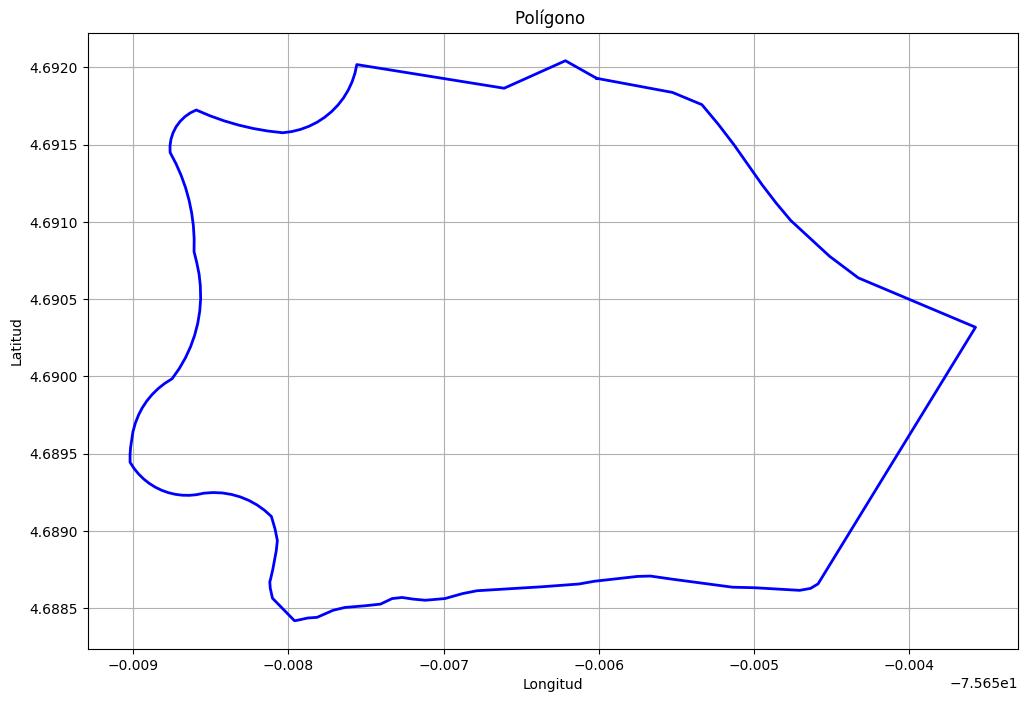

In [ ]:
import matplotlib.pyplot as plt
# Coordenadas del polígono
coordenadas = [[-75.6560144622286, 4.69192930066219], [-75.6555792417039, 4.69184792277146], [-75.6555258509746, 4.69183793926211], [-75.655336249554, 4.69175876839367], [-75.6552300335369, 4.69163079251186], [-75.6551291642854, 4.69149853379347], [-75.6550338137726, 4.69136221598133], [-75.6549489827794, 4.69124089074947], [-75.6549487481279, 4.69124057703611], [-75.6548591208862, 4.69112326665706], [-75.6548589020152, 4.69112299802631], [-75.6547643899918, 4.69100955466079], [-75.6545138962908, 4.69077752973122], [-75.6545062951944, 4.69077178700231], [-75.6545041260799, 4.69077014813228], [-75.6544420529584, 4.69072324974622], [-75.654440140035, 4.69072180430928], [-75.6544182398037, 4.69070525807123], [-75.6543288979923, 4.69063775728657], [-75.6540678082047, 4.69052721823367], [-75.653573643749, 4.69031800102348], [-75.6545879033579, 4.68865717817707], [-75.6546362446591, 4.68862786217201], [-75.6547065510611, 4.68861518621853], [-75.6548363595961, 4.68862276514914], [-75.6549964429569, 4.68863211252703], [-75.655139123831, 4.68863562144977], [-75.6555254476252, 4.68868715589648], [-75.6556689039947, 4.68870776606356], [-75.6557522999611, 4.68870524180865], [-75.6560286204176, 4.68867414681087], [-75.6561287491765, 4.68865619670431], [-75.6563683420773, 4.68863824648801], [-75.6567852319587, 4.68861266428247], [-75.6568779235671, 4.68859426951708], [-75.656992355553, 4.68856195978213], [-75.657117515909, 4.68855118963035], [-75.6571961879918, 4.68855836942238], [-75.6572677085099, 4.68856913994768], [-75.6573320768211, 4.68856195991188], [-75.6574071732085, 4.68852605976266], [-75.6575073009857, 4.68851528926892], [-75.657636037566, 4.68850451905728], [-75.6577111337368, 4.68848656934825], [-75.6578154505451, 4.68844048855774], [-75.6578757657446, 4.68843610905951], [-75.657894166683, 4.68843210452508], [-75.6579071518175, 4.68842927778692], [-75.6579121655838, 4.68842818686421], [-75.6579303655041, 4.68842422531379], [-75.6579485654226, 4.6884202646668], [-75.6579610607294, 4.68841861036706], [-75.6579671342961, 4.68842486807232], [-75.6580644080953, 4.6885251374011], [-75.6580965891928, 4.68855794494151], [-75.6581029337193, 4.68856441276097], [-75.6581172378135, 4.68862951142534], [-75.6581200983982, 4.68867067786952], [-75.6581151329923, 4.68868798272674], [-75.6581000437883, 4.68875426018468], [-75.6580823583785, 4.68884881142676], [-75.6580783972939, 4.68887252882326], [-75.6580714049963, 4.68893736814406], [-75.6580860599654, 4.68901120590753], [-75.6581097618446, 4.68909327791134], [-75.6581538583662, 4.68913326763643], [-75.6581539567064, 4.68913335341812], [-75.658202301924, 4.68916798754452], [-75.6582024335922, 4.68916807851677], [-75.6582544699761, 4.68919695421844], [-75.6582545635833, 4.68919700413053], [-75.6583096530626, 4.68921974252512], [-75.6583668605296, 4.68923596171621], [-75.6583669776026, 4.68923599238991], [-75.6584256231195, 4.68924552073523], [-75.6584257798537, 4.68924554365456], [-75.6584851752596, 4.68924826554555], [-75.658485286983, 4.68924826818332], [-75.6585447124517, 4.68924413183219], [-75.658593266054, 4.68923416587721], [-75.6586386126531, 4.68923010789063], [-75.6586840151042, 4.68923096735339], [-75.6586841313285, 4.6892309721097], [-75.6587292004043, 4.68923673919105], [-75.6587292913807, 4.68923675323769], [-75.6587734190464, 4.68924734624377], [-75.6587735670385, 4.68924738511651], [-75.658816445875, 4.68926273742885], [-75.6588578799496, 4.68928290259045], [-75.6588580194669, 4.68928297368987], [-75.6588971441046, 4.68930764377893], [-75.6589332144868, 4.68933635291118], [-75.6589333434192, 4.68933646015037], [-75.6589661952275, 4.68936907389427], [-75.6589951899885, 4.6894049659649], [-75.6589952879458, 4.68940509272853], [-75.6590202893651, 4.68944408294681], [-75.6590204190842, 4.68949187946244], [-75.6590170872486, 4.68953955955882], [-75.6590103105871, 4.68958687014019], [-75.6590019911315, 4.68964053866842], [-75.6590019416165, 4.68964081550346], [-75.6590018899998, 4.68964110318655], [-75.6590018695208, 4.68964120796125], [-75.6590013191414, 4.6896432753196], [-75.6589964233819, 4.68966164166393], [-75.65898774496, 4.6896941990745], [-75.6589877101868, 4.68969431472012], [-75.6589876913591, 4.68969436719272], [-75.6589861642941, 4.6896983390491], [-75.6589780103468, 4.68971954919219], [-75.6589680399829, 4.6897454837403], [-75.6589679862607, 4.68974561290797], [-75.6589650291229, 4.68975138277085], [-75.658953970078, 4.68977296399375], [-75.6589430005886, 4.68979437001562], [-75.6589429243185, 4.6897945099859], [-75.6589381626867, 4.6898017750703], [-75.6589244490068, 4.68982269818723], [-75.6589129035918, 4.68984031393257], [-75.6589128114157, 4.68984044784359], [-75.6589058861147, 4.68984889100784], [-75.6588897601936, 4.68986855352051], [-75.6588780882477, 4.68988278762122], [-75.6588779879981, 4.68988290373655], [-75.6588685886292, 4.68989214827173], [-75.6588503153348, 4.68991012220596], [-75.6588389384606, 4.68992131392844], [-75.6588388539037, 4.68992139301026], [-75.6588266911508, 4.68993103332118], [-75.658806591965, 4.68994696585262], [-75.6587959074735, 4.68995543633344], [-75.6587958515248, 4.68995547810664], [-75.6587952945391, 4.68995584702602], [-75.6587803858839, 4.68996525725519], [-75.6587494760165, 4.68998477039272], [-75.658747620837, 4.68998741966008], [-75.6587192205596, 4.69002796420463], [-75.6587037360445, 4.69005006890346], [-75.6587036667535, 4.6900501736305], [-75.658697504499, 4.69006091247705], [-75.6586774932126, 4.69009578950198], [-75.6586639639767, 4.69011936813031], [-75.658663917552, 4.69011945301516], [-75.6586588138769, 4.69013055863879], [-75.658642005958, 4.69016713241175], [-75.6586305786508, 4.69019199632509], [-75.65863055753, 4.69019204419592], [-75.6586304249655, 4.69019239710224], [-75.6586264757455, 4.69020353972587], [-75.6586131062831, 4.69024125595013], [-75.6586038709539, 4.6902673104276], [-75.6586038512643, 4.69026736641845], [-75.658600892363, 4.69027891666373], [-75.6585909624524, 4.69031767951466], [-75.6585840949797, 4.69034448641954], [-75.6585840268071, 4.69034478099586], [-75.6585821500045, 4.69035635513669], [-75.6585757057234, 4.69039610323424], [-75.658571237196, 4.69042367216465], [-75.6585712331167, 4.69042371417294], [-75.6585704160108, 4.69043523712719], [-75.6585675742506, 4.69047534783056], [-75.6585655857474, 4.69050342095485], [-75.6585658041806, 4.69051483602479], [-75.6585667574112, 4.69056441062902], [-75.6585671205054, 4.69058327582547], [-75.65856712226, 4.6905833400201], [-75.6585676855343, 4.69058848511441], [-75.6585758304733, 4.69066279783772], [-75.6585904084791, 4.69073520346883], [-75.6585904914632, 4.69073560593231], [-75.6586081158155, 4.69080774835324], [-75.6586073483917, 4.6908912243268], [-75.6586073478942, 4.69089132196142], [-75.6586124187731, 4.69097456571168], [-75.6586124319309, 4.69097474292895], [-75.6586233073415, 4.69105737469376], [-75.6586233393224, 4.69105760076706], [-75.6586399671726, 4.6911392407469], [-75.6586400189399, 4.69113948494107], [-75.6586623189016, 4.69121975508695], [-75.6586623869022, 4.69121999208186], [-75.6586902677788, 4.69129854204611], [-75.6586903349872, 4.69129872509875], [-75.6587236704926, 4.6913751791494], [-75.6587237213177, 4.69137529496893], [-75.6587623859737, 4.69144932348116], [-75.6587629763844, 4.69149249950684], [-75.658762972955, 4.69149256470515], [-75.6587566446897, 4.69153523445856], [-75.6587566269196, 4.69153532391581], [-75.6587435526553, 4.69157639771882], [-75.658743517612, 4.69157649829662], [-75.6587240325056, 4.6916149274216], [-75.6587239758277, 4.69161503277695], [-75.6586985770098, 4.69164983163778], [-75.6586985134732, 4.6916499125703], [-75.6586678524145, 4.69168017966245], [-75.6586677958418, 4.69168023288543], [-75.6586326249656, 4.69170519769324], [-75.6585938995653, 4.6917241714766], [-75.6585049636655, 4.69168648083772], [-75.6585047979994, 4.69168641872534], [-75.6584140339161, 4.69165392556581], [-75.6584137766788, 4.69165384639193], [-75.6583214074384, 4.69162661504893], [-75.6583211165465, 4.69162654364158], [-75.6582273798989, 4.69160463516753], [-75.6582270877704, 4.69160458123561], [-75.6581322605047, 4.69158805947448], [-75.6581320812446, 4.69158803620779], [-75.6580363546036, 4.69157693891415], [-75.6579787242805, 4.69158456205124], [-75.6579785716574, 4.6915845852457], [-75.6579220766151, 4.69159861606186], [-75.6579219969803, 4.69159863729537], [-75.6578674545596, 4.69161887826412], [-75.6578673346267, 4.6916189250299], [-75.6578153826523, 4.69164513335961], [-75.6578152632854, 4.69164519730318], [-75.6577664413981, 4.69167711583966], [-75.657721573944, 4.69171420173084], [-75.6577214520916, 4.69171430665212], [-75.6576809653526, 4.69175618915202], [-75.6576808817366, 4.69175627703066], [-75.6576808117389, 4.69175636597992], [-75.6576453522741, 4.6918023517699], [-75.6576452992097, 4.69180242243105], [-75.6576452154841, 4.69180253586754], [-75.6576451210785, 4.69180268659276], [-75.6576150566221, 4.6918522315699], [-75.6576149605104, 4.69185239411695], [-75.657614908067, 4.69185248471489], [-75.6576148005477, 4.69185271013797], [-75.6575904529664, 4.69190524014478], [-75.6575903775136, 4.69190540752585], [-75.6575903337595, 4.6919055083872], [-75.6575902490896, 4.69190575137246], [-75.6575718475415, 4.69196078682217], [-75.6575717975448, 4.69196094786308], [-75.6575717653511, 4.69196108760557], [-75.6575595281818, 4.69201811262632], [-75.6568396331683, 4.69190205344565], [-75.6566102778585, 4.69186507723352], [-75.6565015474739, 4.69191411842344], [-75.6562154846527, 4.6920431425841], [-75.6560144622286, 4.69192930066219]]

# Convertir las coordenadas a dos listas: una de longitudes y otra de latitudes
longitudes, latitudes = zip(*coordenadas)

# Crear la figura y el gráfico
plt.figure(figsize=(12, 8))

# Graficar las líneas del polígono
plt.plot(longitudes, latitudes, linestyle='-', color='blue', linewidth=2)

# Cerrar el polígono conectando el último punto con el primero
plt.plot([longitudes[-1], longitudes[0]], [latitudes[-1], latitudes[0]], linestyle='-', color='blue', linewidth=2)

# Añadir etiquetas y mostrar la figura
plt.title('Polígono ')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


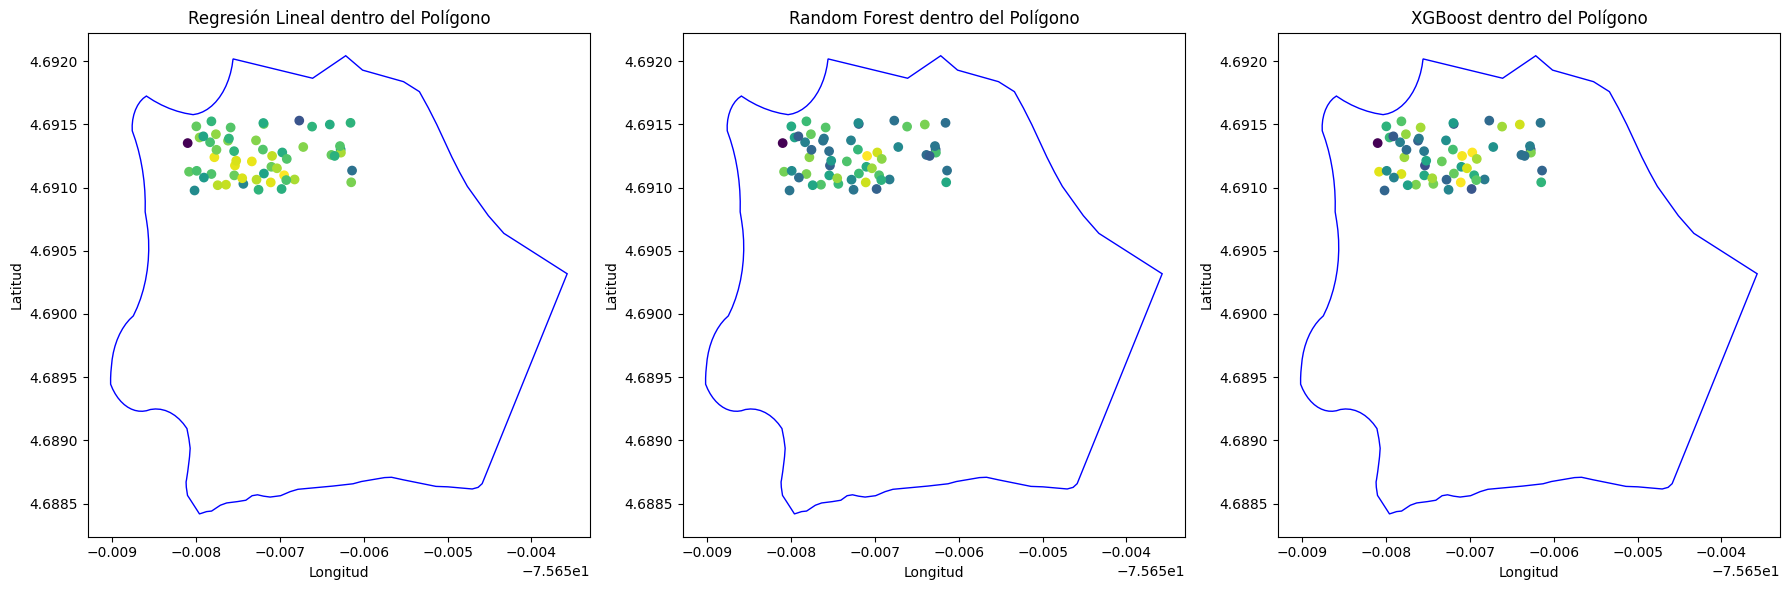

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
from shapely.geometry import Polygon as ShapelyPolygon
from shapely.geometry import Point

# Suprimir advertencias
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

# Cargar los datos
df = dataframemg

# Preparar las características y el objetivo
X = df[['_Ubicación GPS_latitude', '_Ubicación GPS_longitude',
        'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt',
        'HT altura del árbol o del fuste 1 (mt)', 'Area (m²)', 'NDVI']]
y = df['Biomasa (Mg/ha)']

# Definir el polígono base como ejemplo (sustituir por el polígono real)
# Asegúrate de tener las coordenadas del polígono en formato adecuado
polygon_coords = [[-75.6560144622286, 4.69192930066219], [-75.6555792417039, 4.69184792277146], [-75.6555258509746, 4.69183793926211], [-75.655336249554, 4.69175876839367], [-75.6552300335369, 4.69163079251186], [-75.6551291642854, 4.69149853379347], [-75.6550338137726, 4.69136221598133], [-75.6549489827794, 4.69124089074947], [-75.6549487481279, 4.69124057703611], [-75.6548591208862, 4.69112326665706], [-75.6548589020152, 4.69112299802631], [-75.6547643899918, 4.69100955466079], [-75.6545138962908, 4.69077752973122], [-75.6545062951944, 4.69077178700231], [-75.6545041260799, 4.69077014813228], [-75.6544420529584, 4.69072324974622], [-75.654440140035, 4.69072180430928], [-75.6544182398037, 4.69070525807123], [-75.6543288979923, 4.69063775728657], [-75.6540678082047, 4.69052721823367], [-75.653573643749, 4.69031800102348], [-75.6545879033579, 4.68865717817707], [-75.6546362446591, 4.68862786217201], [-75.6547065510611, 4.68861518621853], [-75.6548363595961, 4.68862276514914], [-75.6549964429569, 4.68863211252703], [-75.655139123831, 4.68863562144977], [-75.6555254476252, 4.68868715589648], [-75.6556689039947, 4.68870776606356], [-75.6557522999611, 4.68870524180865], [-75.6560286204176, 4.68867414681087], [-75.6561287491765, 4.68865619670431], [-75.6563683420773, 4.68863824648801], [-75.6567852319587, 4.68861266428247], [-75.6568779235671, 4.68859426951708], [-75.656992355553, 4.68856195978213], [-75.657117515909, 4.68855118963035], [-75.6571961879918, 4.68855836942238], [-75.6572677085099, 4.68856913994768], [-75.6573320768211, 4.68856195991188], [-75.6574071732085, 4.68852605976266], [-75.6575073009857, 4.68851528926892], [-75.657636037566, 4.68850451905728], [-75.6577111337368, 4.68848656934825], [-75.6578154505451, 4.68844048855774], [-75.6578757657446, 4.68843610905951], [-75.657894166683, 4.68843210452508], [-75.6579071518175, 4.68842927778692], [-75.6579121655838, 4.68842818686421], [-75.6579303655041, 4.68842422531379], [-75.6579485654226, 4.6884202646668], [-75.6579610607294, 4.68841861036706], [-75.6579671342961, 4.68842486807232], [-75.6580644080953, 4.6885251374011], [-75.6580965891928, 4.68855794494151], [-75.6581029337193, 4.68856441276097], [-75.6581172378135, 4.68862951142534], [-75.6581200983982, 4.68867067786952], [-75.6581151329923, 4.68868798272674], [-75.6581000437883, 4.68875426018468], [-75.6580823583785, 4.68884881142676], [-75.6580783972939, 4.68887252882326], [-75.6580714049963, 4.68893736814406], [-75.6580860599654, 4.68901120590753], [-75.6581097618446, 4.68909327791134], [-75.6581538583662, 4.68913326763643], [-75.6581539567064, 4.68913335341812], [-75.658202301924, 4.68916798754452], [-75.6582024335922, 4.68916807851677], [-75.6582544699761, 4.68919695421844], [-75.6582545635833, 4.68919700413053], [-75.6583096530626, 4.68921974252512], [-75.6583668605296, 4.68923596171621], [-75.6583669776026, 4.68923599238991], [-75.6584256231195, 4.68924552073523], [-75.6584257798537, 4.68924554365456], [-75.6584851752596, 4.68924826554555], [-75.658485286983, 4.68924826818332], [-75.6585447124517, 4.68924413183219], [-75.658593266054, 4.68923416587721], [-75.6586386126531, 4.68923010789063], [-75.6586840151042, 4.68923096735339], [-75.6586841313285, 4.6892309721097], [-75.6587292004043, 4.68923673919105], [-75.6587292913807, 4.68923675323769], [-75.6587734190464, 4.68924734624377], [-75.6587735670385, 4.68924738511651], [-75.658816445875, 4.68926273742885], [-75.6588578799496, 4.68928290259045], [-75.6588580194669, 4.68928297368987], [-75.6588971441046, 4.68930764377893], [-75.6589332144868, 4.68933635291118], [-75.6589333434192, 4.68933646015037], [-75.6589661952275, 4.68936907389427], [-75.6589951899885, 4.6894049659649], [-75.6589952879458, 4.68940509272853], [-75.6590202893651, 4.68944408294681], [-75.6590204190842, 4.68949187946244], [-75.6590170872486, 4.68953955955882], [-75.6590103105871, 4.68958687014019], [-75.6590019911315, 4.68964053866842], [-75.6590019416165, 4.68964081550346], [-75.6590018899998, 4.68964110318655], [-75.6590018695208, 4.68964120796125], [-75.6590013191414, 4.6896432753196], [-75.6589964233819, 4.68966164166393], [-75.65898774496, 4.6896941990745], [-75.6589877101868, 4.68969431472012], [-75.6589876913591, 4.68969436719272], [-75.6589861642941, 4.6896983390491], [-75.6589780103468, 4.68971954919219], [-75.6589680399829, 4.6897454837403], [-75.6589679862607, 4.68974561290797], [-75.6589650291229, 4.68975138277085], [-75.658953970078, 4.68977296399375], [-75.6589430005886, 4.68979437001562], [-75.6589429243185, 4.6897945099859], [-75.6589381626867, 4.6898017750703], [-75.6589244490068, 4.68982269818723], [-75.6589129035918, 4.68984031393257], [-75.6589128114157, 4.68984044784359], [-75.6589058861147, 4.68984889100784], [-75.6588897601936, 4.68986855352051], [-75.6588780882477, 4.68988278762122], [-75.6588779879981, 4.68988290373655], [-75.6588685886292, 4.68989214827173], [-75.6588503153348, 4.68991012220596], [-75.6588389384606, 4.68992131392844], [-75.6588388539037, 4.68992139301026], [-75.6588266911508, 4.68993103332118], [-75.658806591965, 4.68994696585262], [-75.6587959074735, 4.68995543633344], [-75.6587958515248, 4.68995547810664], [-75.6587952945391, 4.68995584702602], [-75.6587803858839, 4.68996525725519], [-75.6587494760165, 4.68998477039272], [-75.658747620837, 4.68998741966008], [-75.6587192205596, 4.69002796420463], [-75.6587037360445, 4.69005006890346], [-75.6587036667535, 4.6900501736305], [-75.658697504499, 4.69006091247705], [-75.6586774932126, 4.69009578950198], [-75.6586639639767, 4.69011936813031], [-75.658663917552, 4.69011945301516], [-75.6586588138769, 4.69013055863879], [-75.658642005958, 4.69016713241175], [-75.6586305786508, 4.69019199632509], [-75.65863055753, 4.69019204419592], [-75.6586304249655, 4.69019239710224], [-75.6586264757455, 4.69020353972587], [-75.6586131062831, 4.69024125595013], [-75.6586038709539, 4.6902673104276], [-75.6586038512643, 4.69026736641845], [-75.658600892363, 4.69027891666373], [-75.6585909624524, 4.69031767951466], [-75.6585840949797, 4.69034448641954], [-75.6585840268071, 4.69034478099586], [-75.6585821500045, 4.69035635513669], [-75.6585757057234, 4.69039610323424], [-75.658571237196, 4.69042367216465], [-75.6585712331167, 4.69042371417294], [-75.6585704160108, 4.69043523712719], [-75.6585675742506, 4.69047534783056], [-75.6585655857474, 4.69050342095485], [-75.6585658041806, 4.69051483602479], [-75.6585667574112, 4.69056441062902], [-75.6585671205054, 4.69058327582547], [-75.65856712226, 4.6905833400201], [-75.6585676855343, 4.69058848511441], [-75.6585758304733, 4.69066279783772], [-75.6585904084791, 4.69073520346883], [-75.6585904914632, 4.69073560593231], [-75.6586081158155, 4.69080774835324], [-75.6586073483917, 4.6908912243268], [-75.6586073478942, 4.69089132196142], [-75.6586124187731, 4.69097456571168], [-75.6586124319309, 4.69097474292895], [-75.6586233073415, 4.69105737469376], [-75.6586233393224, 4.69105760076706], [-75.6586399671726, 4.6911392407469], [-75.6586400189399, 4.69113948494107], [-75.6586623189016, 4.69121975508695], [-75.6586623869022, 4.69121999208186], [-75.6586902677788, 4.69129854204611], [-75.6586903349872, 4.69129872509875], [-75.6587236704926, 4.6913751791494], [-75.6587237213177, 4.69137529496893], [-75.6587623859737, 4.69144932348116], [-75.6587629763844, 4.69149249950684], [-75.658762972955, 4.69149256470515], [-75.6587566446897, 4.69153523445856], [-75.6587566269196, 4.69153532391581], [-75.6587435526553, 4.69157639771882], [-75.658743517612, 4.69157649829662], [-75.6587240325056, 4.6916149274216], [-75.6587239758277, 4.69161503277695], [-75.6586985770098, 4.69164983163778], [-75.6586985134732, 4.6916499125703], [-75.6586678524145, 4.69168017966245], [-75.6586677958418, 4.69168023288543], [-75.6586326249656, 4.69170519769324], [-75.6585938995653, 4.6917241714766], [-75.6585049636655, 4.69168648083772], [-75.6585047979994, 4.69168641872534], [-75.6584140339161, 4.69165392556581], [-75.6584137766788, 4.69165384639193], [-75.6583214074384, 4.69162661504893], [-75.6583211165465, 4.69162654364158], [-75.6582273798989, 4.69160463516753], [-75.6582270877704, 4.69160458123561], [-75.6581322605047, 4.69158805947448], [-75.6581320812446, 4.69158803620779], [-75.6580363546036, 4.69157693891415], [-75.6579787242805, 4.69158456205124], [-75.6579785716574, 4.6915845852457], [-75.6579220766151, 4.69159861606186], [-75.6579219969803, 4.69159863729537], [-75.6578674545596, 4.69161887826412], [-75.6578673346267, 4.6916189250299], [-75.6578153826523, 4.69164513335961], [-75.6578152632854, 4.69164519730318], [-75.6577664413981, 4.69167711583966], [-75.657721573944, 4.69171420173084], [-75.6577214520916, 4.69171430665212], [-75.6576809653526, 4.69175618915202], [-75.6576808817366, 4.69175627703066], [-75.6576808117389, 4.69175636597992], [-75.6576453522741, 4.6918023517699], [-75.6576452992097, 4.69180242243105], [-75.6576452154841, 4.69180253586754], [-75.6576451210785, 4.69180268659276], [-75.6576150566221, 4.6918522315699], [-75.6576149605104, 4.69185239411695], [-75.657614908067, 4.69185248471489], [-75.6576148005477, 4.69185271013797], [-75.6575904529664, 4.69190524014478], [-75.6575903775136, 4.69190540752585], [-75.6575903337595, 4.6919055083872], [-75.6575902490896, 4.69190575137246], [-75.6575718475415, 4.69196078682217], [-75.6575717975448, 4.69196094786308], [-75.6575717653511, 4.69196108760557], [-75.6575595281818, 4.69201811262632], [-75.6568396331683, 4.69190205344565], [-75.6566102778585, 4.69186507723352], [-75.6565015474739, 4.69191411842344], [-75.6562154846527, 4.6920431425841], [-75.6560144622286, 4.69192930066219]]
polygon = ShapelyPolygon(polygon_coords)

# Función para evaluar y graficar resultados dentro del polígono
def evaluar_y_graficar_modelo(model, X, y, nombre_modelo, ax):
    # Ajustar el modelo a todos los datos
    model.fit(X, y)

    # Generar predicciones
    y_pred = model.predict(X)

    # Graficar el polígono
    poly_patch = Polygon(polygon_coords, closed=True, fill=None, edgecolor='blue')
    ax.add_patch(poly_patch)

    # Filtrar las predicciones dentro del polígono
    in_polygon = np.array([polygon.contains(Point(lon, lat)) for lon, lat in zip(X['_Ubicación GPS_longitude'], X['_Ubicación GPS_latitude'])])

    # Graficar las predicciones dentro del polígono
    ax.scatter(X[in_polygon]['_Ubicación GPS_longitude'], X[in_polygon]['_Ubicación GPS_latitude'],
               c=y_pred[in_polygon], cmap='viridis', label=f'{nombre_modelo} Predicciones')

    ax.set_xlabel("Longitud")
    ax.set_ylabel("Latitud")
    ax.set_title(f"{nombre_modelo} dentro del Polígono")

    return y_pred

# Crear figura con 3 subplots en una fila
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Regresión Lineal
lr_model = LinearRegression()
y_pred_lr = evaluar_y_graficar_modelo(lr_model, X, y, "Regresión Lineal", axes[0])

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
y_pred_rf = evaluar_y_graficar_modelo(rf_model, X, y, "Random Forest", axes[1])

# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
y_pred_xgb = evaluar_y_graficar_modelo(xgb_model, X, y, "XGBoost", axes[2])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()


In [ ]:
dataframemg

,ID Subparcela,_Ubicación GPS_latitude,_Ubicación GPS_longitude,Biomasa (kg),"Diametro 1 Altura del Pecho DAP (cm) fuste 1 tomar como parámetro 1,3 mt",HT altura del árbol o del fuste 1 (mt),Area (m²),Area (ha),Biomasa (Mg),Biomasa (Mg/ha),NDVI
0,1,4.690977,-75.658019,4912.348264,12.420664,5.742553,706.858347,0.070686,4.912348,69.495512,0.538725
1,2,4.691029,-75.657437,11291.388977,12.743333,4.933905,706.858347,0.070686,11.291389,159.740477,0.595261
2,3,4.691352,-75.658101,555.487004,39.000000,15.000000,706.858347,0.070686,0.555487,7.858534,0.624996
3,4,4.691530,-75.656770,5184.567362,17.625278,11.180556,706.858347,0.070686,5.184567,73.346624,0.543783
4,5,4.691135,-75.656140,4923.611276,14.536364,7.372093,706.858347,0.070686,4.923611,69.654851,0.541241
5,6,4.691063,-75.657280,1389.674894,16.495015,12.388700,706.858347,0.070686,1.465103,69.760808,0.437190
6,7,4.691278,-75.656972,4036.481611,35.314879,14.214486,706.858347,0.070686,9.212488,199.345059,0.425263
7,8,4.691240,-75.657782,5821.444708,13.195538,6.556352,706.858347,0.070686,7.650792,170.251249,0.593411
8,9,4.691125,-75.658084,2034.053698,24.517565,14.127494,706.858347,0.070686,7.023215,190.518457,0.624996
9,10,4.691524,-75.657818,7380.580077,34.338107,10.724309,706.858347,0.070686,3.173523,147.007421,0.493170


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Mejor Modelo: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
Mean Squared Error (MSE): 3420.916812319515
R-squared (R2): -1.0712731273124305


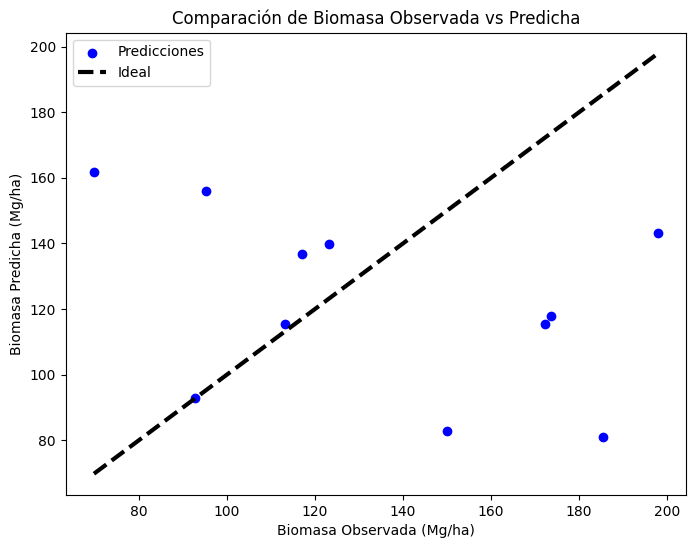

In [ ]:
# @title Modelo de predicción  XGBoost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# Cargar los datos (ajusta la ruta y el nombre del archivo)
dataframemg = dataframemg

# Filtramos para evitar NaNs
dataframemg = dataframemg.dropna()

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características (ejemplo: numéricas)
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear el modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],  # L1 regularization
    'reg_lambda': [0, 1, 10]  # L2 regularization
}

# Realizar Grid Search con validación cruzada
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado por Grid Search
best_model = grid_search.best_estimator_

# Predicciones
y_pred = best_model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejor Modelo: {best_model}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Gráfico de comparación de predicciones vs valores reales
# ... (código original)
# Gráfico de comparación de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title('Comparación de Biomasa Observada vs Predicha')
plt.legend()
plt.show()


Mean Squared Error (MSE): 3215.296056639798
R-squared (R2): -0.946775289737626


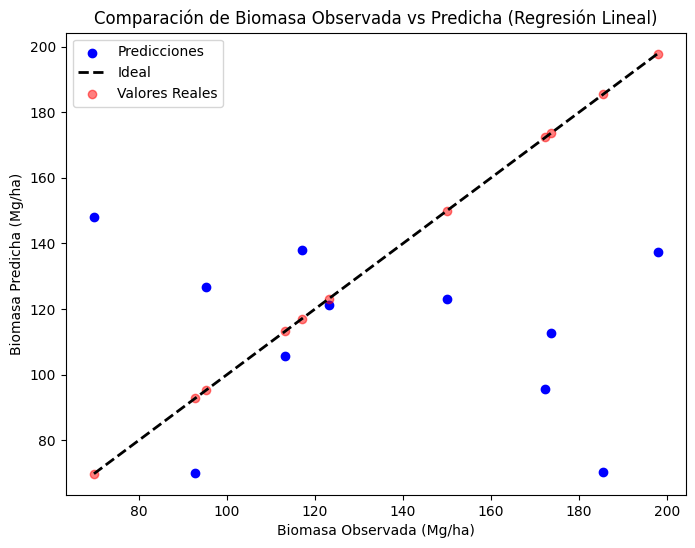

In [ ]:
# @title Modelo de predicción de RL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#import mplcursors

# Asegúrate de que 'dataframemg' contiene las columnas 'Biomasa' y 'NDVI'
# Filtramos para evitar NaNs en los datos
dataframemg = dataframemg.dropna(subset=['Biomasa (Mg/ha)', 'NDVI'])

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características (ejemplo: numéricas)
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = lr_model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Gráfico de comparación de predicciones vs valores reales
plt.figure(figsize=(8, 6))

# Graficar predicciones
scatter_pred = plt.scatter(y_test, y_pred, color='blue', label='Predicciones')

# Graficar la línea ideal (valores reales)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
# Añadir los valores reales (en rojo) para mayor claridad
scatter_real = plt.scatter(y_test, y_test, color='red', label='Valores Reales', alpha=0.5)

plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title('Comparación de Biomasa Observada vs Predicha (Regresión Lineal)')
plt.legend()

# Añadir tooltips interactivos con mplcursors
'''cursor = mplcursors.cursor(scatter_pred, highlight=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(
    f"Observada: {sel.target[0]:.2f}\nPredicha: {sel.target[1]:.2f}"
))'''

plt.show()


Fitting 4 folds for each of 108 candidates, totalling 432 fits
Mean Squared Error (MSE): 2979.125054194608
R-squared (R2): -0.8037800993683282


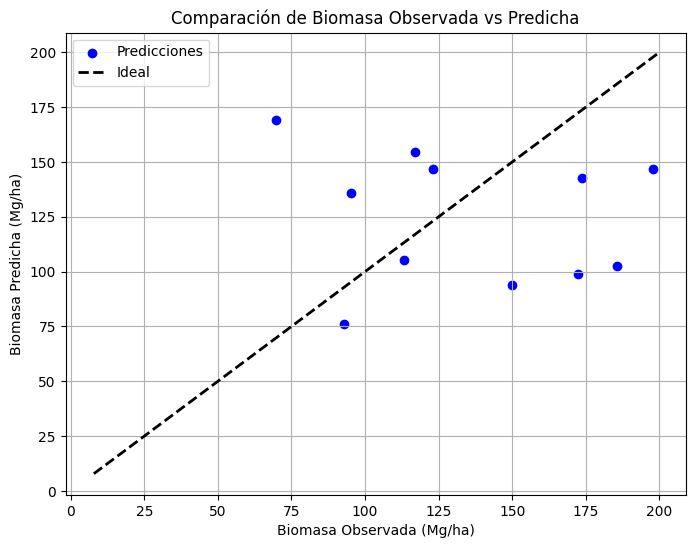

In [ ]:
# @title Modelo de prediccion Random Forest
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# Cargar los datos (ajusta la ruta y el nombre del archivo)
dataframemg = dataframemg

# Filtramos para evitar NaNs
dataframemg = dataframemg.dropna()

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características (ejemplo: numéricas)
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Definir y entrenar un modelo Random Forest con búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=4, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor estimador
best_rf = grid_search.best_estimator_

# Predicción y evaluación del modelo
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Visualización de resultados
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title('Comparación de Biomasa Observada vs Predicha')
plt.legend()
plt.grid(True)
plt.show()


Este código compara tres modelos de machine learning para predecir la **biomasa (Mg/ha)** usando un conjunto de características como el **NDVI**, diámetro a la altura del pecho (DAP), altura del árbol y combinaciones derivadas de estos datos. Los tres modelos evaluados son:

1. **XGBoost**
2. **Regresión Lineal**
3. **Random Forest**

### Flujo del código:

1. **Preprocesamiento de datos**:
   - Se eliminan valores nulos.
   - Se crean dos nuevas características: **NDVI/DAP** y **HT\*NDVI**.
   - Se escalan los datos (normalización) para mejorar el rendimiento de los modelos.

2. **División de datos**:
   - Los datos se dividen en conjuntos de entrenamiento (80%) y prueba (20%).

3. **Entrenamiento de modelos**:
   - **XGBoost**: Se ajusta mediante búsqueda de hiperparámetros usando validación cruzada.
   - **Regresión Lineal**: Entrenamiento sin ajuste adicional.
   - **Random Forest**: También se ajusta con búsqueda de hiperparámetros.

4. **Evaluación del rendimiento**:
   - Se calculan dos métricas principales para cada modelo:
     - **MSE (Mean Squared Error)**: mide el error promedio en las predicciones (más bajo es mejor).
     - **R² (Coeficiente de Determinación)**: indica qué tan bien predice el modelo (más cerca de 1 es mejor).
   - Se generan predicciones para el conjunto de prueba y se evalúan las métricas.

5. **Visualización**:
   - Se generan gráficos para cada modelo, comparando los valores observados de biomasa con las predicciones.
   - Un gráfico final muestra una comparación visual de las predicciones de los tres modelos.

### Objetivo:
Este enfoque permite identificar cuál de los tres modelos predice mejor la biomasa y cómo se comportan en relación con los valores reales.

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
Fitting 4 folds for each of 108 candidates, totalling 432 fits


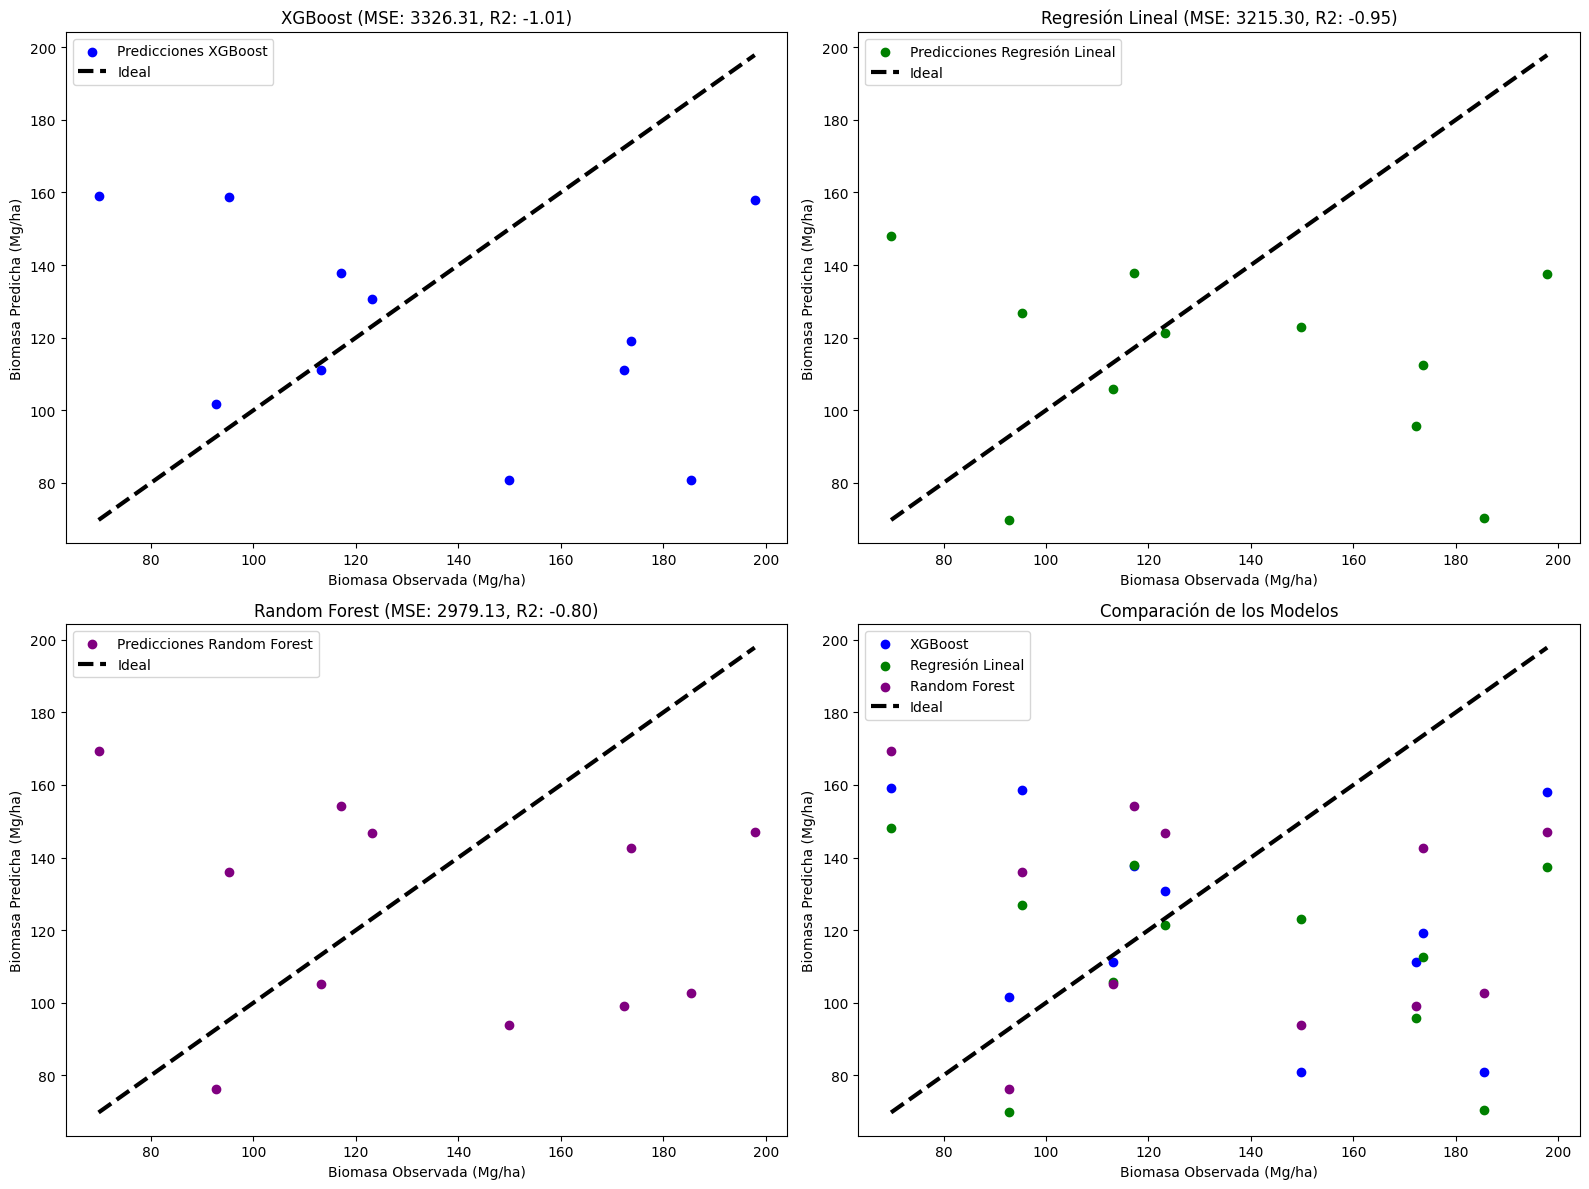

In [ ]:
# @title Comparativo RL - RF - XGBoost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Cargar los datos y asegurarse de que no haya NaNs
dataframemg = dataframemg.dropna()

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Modelo 1: XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 1, 10]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=4, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_

# Predicciones y evaluación
y_pred_xgb = best_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

### Modelo 2: Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

### Modelo 3: Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=4, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Predicciones y evaluación
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

### Gráficas de comparación
plt.figure(figsize=(16, 12))

# Gráfico XGBoost
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_xgb, color='blue', label='Predicciones XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title(f'XGBoost (MSE: {mse_xgb:.2f}, R2: {r2_xgb:.2f})')
plt.legend()

# Gráfico Regresión Lineal
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_lr, color='green', label='Predicciones Regresión Lineal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title(f'Regresión Lineal (MSE: {mse_lr:.2f}, R2: {r2_lr:.2f})')
plt.legend()

# Gráfico Random Forest
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_rf, color='purple', label='Predicciones Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title(f'Random Forest (MSE: {mse_rf:.2f}, R2: {r2_rf:.2f})')
plt.legend()

# Comparación de los tres modelos
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_xgb, color='blue', label='XGBoost')
plt.scatter(y_test, y_pred_lr, color='green', label='Regresión Lineal')
plt.scatter(y_test, y_pred_rf, color='purple', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Biomasa Observada (Mg/ha)')
plt.ylabel('Biomasa Predicha (Mg/ha)')
plt.title('Comparación de los Modelos')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# @title Predicciones
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import folium

# Asegurarse de que no haya NaNs
dataframemg = dataframemg.dropna()

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Modelo 1: XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)

### Modelo 2: Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

### Modelo 3: Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

### Crear un nuevo DataFrame para las predicciones
predicciones_df = pd.DataFrame({
    'Biomasa Observada (Mg/ha)': y_test,
    'Predicción XGBoost (Mg/ha)': y_pred_xgb,
    'Predicción Regresión Lineal (Mg/ha)': y_pred_lr,
    'Predicción Random Forest (Mg/ha)': y_pred_rf
})

# Restablecer el índice de y_test para alinearlo con predicciones_df
y_test = y_test.reset_index(drop=True)

# Asignar las predicciones al DataFrame original
dataframemg_test = dataframemg.iloc[y_test.index].copy()
dataframemg_test['Predicción XGBoost (Mg/ha)'] = y_pred_xgb
dataframemg_test['Predicción Regresión Lineal (Mg/ha)'] = y_pred_lr
dataframemg_test['Predicción Random Forest (Mg/ha)'] = y_pred_rf

### Visualización de los resultados en un mapa
# Suponiendo que tienes las coordenadas geográficas en columnas 'Latitud' y 'Longitud'
dataframemg_test['Ubicación GPS_latitude'] = dataframemg_test['_Ubicación GPS_latitude']
dataframemg_test['Ubicación GPS_longitude'] = dataframemg_test['_Ubicación GPS_longitude']

# Crear un mapa centrado en la ubicación promedio de los puntos
mapa = folium.Map(location=[dataframemg_test['Ubicación GPS_latitude'].mean(), dataframemg_test['Ubicación GPS_longitude'].mean()], zoom_start=10)

# Agregar marcadores al mapa para cada predicción de XGBoost
for index, row in dataframemg_test.iterrows():
    folium.CircleMarker(
        location=[row['Ubicación GPS_latitude'], row['Ubicación GPS_longitude']],
        radius=row['Predicción XGBoost (Mg/ha)'] * 5,  # Ajusta el radio según tu escala
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        popup=f"Biomasa Predicha XGBoost: {row['Predicción XGBoost (Mg/ha)']:.2f} Mg/ha"
    ).add_to(mapa)

# Mostrar el mapa
mapa

### Mostrar el nuevo DataFrame con las predicciones
predicciones_df



,Biomasa Observada (Mg/ha),Predicción XGBoost (Mg/ha),Predicción Regresión Lineal (Mg/ha),Predicción Random Forest (Mg/ha)
31,185.471917,84.918953,70.349052,103.500028
5,69.760808,188.122498,148.078934,172.609116
32,95.240858,155.914139,126.813489,128.114897
13,172.336523,98.266533,95.694286,97.615124
19,117.094706,148.663956,137.885339,157.314829
49,149.886602,71.602203,123.053087,94.609821
41,197.861442,158.117065,137.457979,149.668668
26,173.654505,128.816360,112.594319,144.397290
43,113.174051,93.992729,105.770748,101.318847
12,123.186131,167.522842,121.309083,153.509247


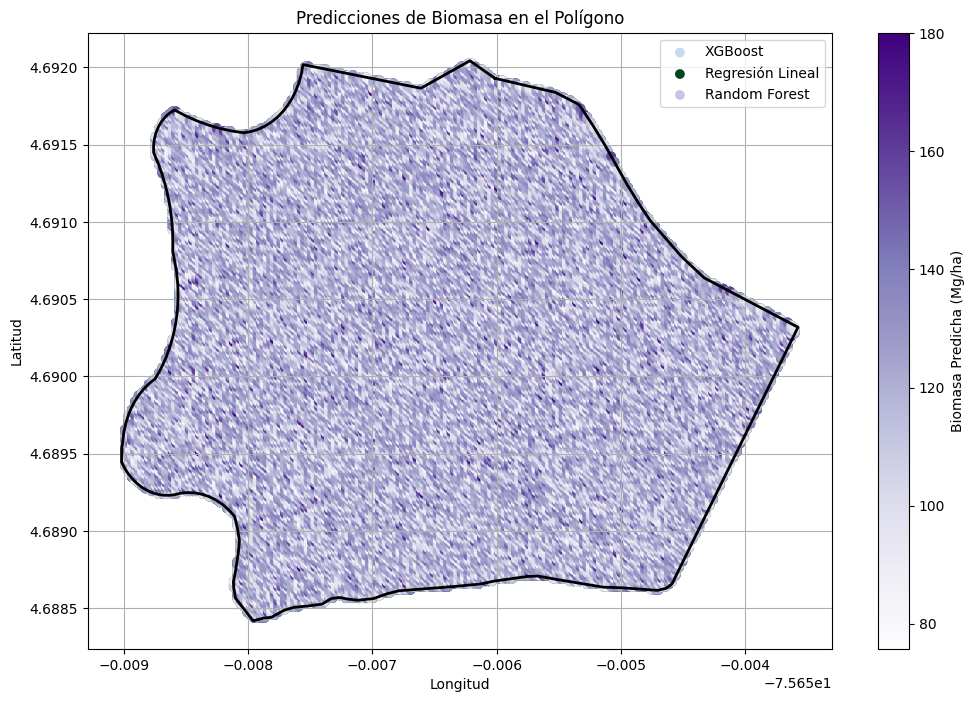

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 1. Definir las coordenadas del polígono
coordenadas = [[-75.6560144622286, 4.69192930066219], [-75.6555792417039, 4.69184792277146], [-75.6555258509746, 4.69183793926211], [-75.655336249554, 4.69175876839367], [-75.6552300335369, 4.69163079251186], [-75.6551291642854, 4.69149853379347], [-75.6550338137726, 4.69136221598133], [-75.6549489827794, 4.69124089074947], [-75.6549487481279, 4.69124057703611], [-75.6548591208862, 4.69112326665706], [-75.6548589020152, 4.69112299802631], [-75.6547643899918, 4.69100955466079], [-75.6545138962908, 4.69077752973122], [-75.6545062951944, 4.69077178700231], [-75.6545041260799, 4.69077014813228], [-75.6544420529584, 4.69072324974622], [-75.654440140035, 4.69072180430928], [-75.6544182398037, 4.69070525807123], [-75.6543288979923, 4.69063775728657], [-75.6540678082047, 4.69052721823367], [-75.653573643749, 4.69031800102348], [-75.6545879033579, 4.68865717817707], [-75.6546362446591, 4.68862786217201], [-75.6547065510611, 4.68861518621853], [-75.6548363595961, 4.68862276514914], [-75.6549964429569, 4.68863211252703], [-75.655139123831, 4.68863562144977], [-75.6555254476252, 4.68868715589648], [-75.6556689039947, 4.68870776606356], [-75.6557522999611, 4.68870524180865], [-75.6560286204176, 4.68867414681087], [-75.6561287491765, 4.68865619670431], [-75.6563683420773, 4.68863824648801], [-75.6567852319587, 4.68861266428247], [-75.6568779235671, 4.68859426951708], [-75.656992355553, 4.68856195978213], [-75.657117515909, 4.68855118963035], [-75.6571961879918, 4.68855836942238], [-75.6572677085099, 4.68856913994768], [-75.6573320768211, 4.68856195991188], [-75.6574071732085, 4.68852605976266], [-75.6575073009857, 4.68851528926892], [-75.657636037566, 4.68850451905728], [-75.6577111337368, 4.68848656934825], [-75.6578154505451, 4.68844048855774], [-75.6578757657446, 4.68843610905951], [-75.657894166683, 4.68843210452508], [-75.6579071518175, 4.68842927778692], [-75.6579121655838, 4.68842818686421], [-75.6579303655041, 4.68842422531379], [-75.6579485654226, 4.6884202646668], [-75.6579610607294, 4.68841861036706], [-75.6579671342961, 4.68842486807232], [-75.6580644080953, 4.6885251374011], [-75.6580965891928, 4.68855794494151], [-75.6581029337193, 4.68856441276097], [-75.6581172378135, 4.68862951142534], [-75.6581200983982, 4.68867067786952], [-75.6581151329923, 4.68868798272674], [-75.6581000437883, 4.68875426018468], [-75.6580823583785, 4.68884881142676], [-75.6580783972939, 4.68887252882326], [-75.6580714049963, 4.68893736814406], [-75.6580860599654, 4.68901120590753], [-75.6581097618446, 4.68909327791134], [-75.6581538583662, 4.68913326763643], [-75.6581539567064, 4.68913335341812], [-75.658202301924, 4.68916798754452], [-75.6582024335922, 4.68916807851677], [-75.6582544699761, 4.68919695421844], [-75.6582545635833, 4.68919700413053], [-75.6583096530626, 4.68921974252512], [-75.6583668605296, 4.68923596171621], [-75.6583669776026, 4.68923599238991], [-75.6584256231195, 4.68924552073523], [-75.6584257798537, 4.68924554365456], [-75.6584851752596, 4.68924826554555], [-75.658485286983, 4.68924826818332], [-75.6585447124517, 4.68924413183219], [-75.658593266054, 4.68923416587721], [-75.6586386126531, 4.68923010789063], [-75.6586840151042, 4.68923096735339], [-75.6586841313285, 4.6892309721097], [-75.6587292004043, 4.68923673919105], [-75.6587292913807, 4.68923675323769], [-75.6587734190464, 4.68924734624377], [-75.6587735670385, 4.68924738511651], [-75.658816445875, 4.68926273742885], [-75.6588578799496, 4.68928290259045], [-75.6588580194669, 4.68928297368987], [-75.6588971441046, 4.68930764377893], [-75.6589332144868, 4.68933635291118], [-75.6589333434192, 4.68933646015037], [-75.6589661952275, 4.68936907389427], [-75.6589951899885, 4.6894049659649], [-75.6589952879458, 4.68940509272853], [-75.6590202893651, 4.68944408294681], [-75.6590204190842, 4.68949187946244], [-75.6590170872486, 4.68953955955882], [-75.6590103105871, 4.68958687014019], [-75.6590019911315, 4.68964053866842], [-75.6590019416165, 4.68964081550346], [-75.6590018899998, 4.68964110318655], [-75.6590018695208, 4.68964120796125], [-75.6590013191414, 4.6896432753196], [-75.6589964233819, 4.68966164166393], [-75.65898774496, 4.6896941990745], [-75.6589877101868, 4.68969431472012], [-75.6589876913591, 4.68969436719272], [-75.6589861642941, 4.6896983390491], [-75.6589780103468, 4.68971954919219], [-75.6589680399829, 4.6897454837403], [-75.6589679862607, 4.68974561290797], [-75.6589650291229, 4.68975138277085], [-75.658953970078, 4.68977296399375], [-75.6589430005886, 4.68979437001562], [-75.6589429243185, 4.6897945099859], [-75.6589381626867, 4.6898017750703], [-75.6589244490068, 4.68982269818723], [-75.6589129035918, 4.68984031393257], [-75.6589128114157, 4.68984044784359], [-75.6589058861147, 4.68984889100784], [-75.6588897601936, 4.68986855352051], [-75.6588780882477, 4.68988278762122], [-75.6588779879981, 4.68988290373655], [-75.6588685886292, 4.68989214827173], [-75.6588503153348, 4.68991012220596], [-75.6588389384606, 4.68992131392844], [-75.6588388539037, 4.68992139301026], [-75.6588266911508, 4.68993103332118], [-75.658806591965, 4.68994696585262], [-75.6587959074735, 4.68995543633344], [-75.6587958515248, 4.68995547810664], [-75.6587952945391, 4.68995584702602], [-75.6587803858839, 4.68996525725519], [-75.6587494760165, 4.68998477039272], [-75.658747620837, 4.68998741966008], [-75.6587192205596, 4.69002796420463], [-75.6587037360445, 4.69005006890346], [-75.6587036667535, 4.6900501736305], [-75.658697504499, 4.69006091247705], [-75.6586774932126, 4.69009578950198], [-75.6586639639767, 4.69011936813031], [-75.658663917552, 4.69011945301516], [-75.6586588138769, 4.69013055863879], [-75.658642005958, 4.69016713241175], [-75.6586305786508, 4.69019199632509], [-75.65863055753, 4.69019204419592], [-75.6586304249655, 4.69019239710224], [-75.6586264757455, 4.69020353972587], [-75.6586131062831, 4.69024125595013], [-75.6586038709539, 4.6902673104276], [-75.6586038512643, 4.69026736641845], [-75.658600892363, 4.69027891666373], [-75.6585909624524, 4.69031767951466], [-75.6585840949797, 4.69034448641954], [-75.6585840268071, 4.69034478099586], [-75.6585821500045, 4.69035635513669], [-75.6585757057234, 4.69039610323424], [-75.658571237196, 4.69042367216465], [-75.6585712331167, 4.69042371417294], [-75.6585704160108, 4.69043523712719], [-75.6585675742506, 4.69047534783056], [-75.6585655857474, 4.69050342095485], [-75.6585658041806, 4.69051483602479], [-75.6585667574112, 4.69056441062902], [-75.6585671205054, 4.69058327582547], [-75.65856712226, 4.6905833400201], [-75.6585676855343, 4.69058848511441], [-75.6585758304733, 4.69066279783772], [-75.6585904084791, 4.69073520346883], [-75.6585904914632, 4.69073560593231], [-75.6586081158155, 4.69080774835324], [-75.6586073483917, 4.6908912243268], [-75.6586073478942, 4.69089132196142], [-75.6586124187731, 4.69097456571168], [-75.6586124319309, 4.69097474292895], [-75.6586233073415, 4.69105737469376], [-75.6586233393224, 4.69105760076706], [-75.6586399671726, 4.6911392407469], [-75.6586400189399, 4.69113948494107], [-75.6586623189016, 4.69121975508695], [-75.6586623869022, 4.69121999208186], [-75.6586902677788, 4.69129854204611], [-75.6586903349872, 4.69129872509875], [-75.6587236704926, 4.6913751791494], [-75.6587237213177, 4.69137529496893], [-75.6587623859737, 4.69144932348116], [-75.6587629763844, 4.69149249950684], [-75.658762972955, 4.69149256470515], [-75.6587566446897, 4.69153523445856], [-75.6587566269196, 4.69153532391581], [-75.6587435526553, 4.69157639771882], [-75.658743517612, 4.69157649829662], [-75.6587240325056, 4.6916149274216], [-75.6587239758277, 4.69161503277695], [-75.6586985770098, 4.69164983163778], [-75.6586985134732, 4.6916499125703], [-75.6586678524145, 4.69168017966245], [-75.6586677958418, 4.69168023288543], [-75.6586326249656, 4.69170519769324], [-75.6585938995653, 4.6917241714766], [-75.6585049636655, 4.69168648083772], [-75.6585047979994, 4.69168641872534], [-75.6584140339161, 4.69165392556581], [-75.6584137766788, 4.69165384639193], [-75.6583214074384, 4.69162661504893], [-75.6583211165465, 4.69162654364158], [-75.6582273798989, 4.69160463516753], [-75.6582270877704, 4.69160458123561], [-75.6581322605047, 4.69158805947448], [-75.6581320812446, 4.69158803620779], [-75.6580363546036, 4.69157693891415], [-75.6579787242805, 4.69158456205124], [-75.6579785716574, 4.6915845852457], [-75.6579220766151, 4.69159861606186], [-75.6579219969803, 4.69159863729537], [-75.6578674545596, 4.69161887826412], [-75.6578673346267, 4.6916189250299], [-75.6578153826523, 4.69164513335961], [-75.6578152632854, 4.69164519730318], [-75.6577664413981, 4.69167711583966], [-75.657721573944, 4.69171420173084], [-75.6577214520916, 4.69171430665212], [-75.6576809653526, 4.69175618915202], [-75.6576808817366, 4.69175627703066], [-75.6576808117389, 4.69175636597992], [-75.6576453522741, 4.6918023517699], [-75.6576452992097, 4.69180242243105], [-75.6576452154841, 4.69180253586754], [-75.6576451210785, 4.69180268659276], [-75.6576150566221, 4.6918522315699], [-75.6576149605104, 4.69185239411695], [-75.657614908067, 4.69185248471489], [-75.6576148005477, 4.69185271013797], [-75.6575904529664, 4.69190524014478], [-75.6575903775136, 4.69190540752585], [-75.6575903337595, 4.6919055083872], [-75.6575902490896, 4.69190575137246], [-75.6575718475415, 4.69196078682217], [-75.6575717975448, 4.69196094786308], [-75.6575717653511, 4.69196108760557], [-75.6575595281818, 4.69201811262632], [-75.6568396331683, 4.69190205344565], [-75.6566102778585, 4.69186507723352], [-75.6565015474739, 4.69191411842344], [-75.6562154846527, 4.6920431425841], [-75.6560144622286, 4.69192930066219]]

# Crear el polígono usando shapely
poligono = Polygon(coordenadas)

# Definir el número de puntos a generar en la malla
num_puntos = 200

# Generar una malla de puntos dentro del bounding box del polígono
longitudes = np.linspace(min([p[0] for p in coordenadas]), max([p[0] for p in coordenadas]), num_puntos)
latitudes = np.linspace(min([p[1] for p in coordenadas]), max([p[1] for p in coordenadas]), num_puntos)
puntos_malla = [(lon, lat) for lon in longitudes for lat in latitudes if poligono.contains(Point(lon, lat))]

# 2. Cargar los datos de entrenamiento y preparar las características
dataframemg = dataframemg
dataframemg = dataframemg.dropna()

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Entrenar los modelos
# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 4. Predecir la biomasa en la malla de puntos
predicciones_xgb = []
predicciones_lr = []
predicciones_rf = []

for punto in puntos_malla:
    # Generar valores de NDVI, DAP, y altura para cada punto (ejemplo con valores aleatorios, ajusta esto)
    ndvi = np.random.rand()  # Aquí deberías calcular el valor real del NDVI para el punto
    dap = np.random.rand() * 30  # Un ejemplo de DAP en cm
    altura = np.random.rand() * 20  # Un ejemplo de altura en metros

    # Crear un array con las características necesarias
    caracteristicas = scaler.transform([[ndvi, dap, altura, ndvi / dap, altura * ndvi]])

    # Hacer predicciones usando los modelos
    predicciones_xgb.append(xgb_model.predict(caracteristicas)[0])
    predicciones_lr.append(lr_model.predict(caracteristicas)[0])
    predicciones_rf.append(rf_model.predict(caracteristicas)[0])

# 5. Graficar el polígono y las predicciones
plt.figure(figsize=(12, 8))

# Graficar el polígono
longitudes_poligono, latitudes_poligono = zip(*coordenadas)
plt.plot(longitudes_poligono, latitudes_poligono, linestyle='-', color='black', linewidth=2)

# Graficar las predicciones de XGBoost en la malla
plt.scatter([p[0] for p in puntos_malla], [p[1] for p in puntos_malla], c=predicciones_xgb, cmap='Blues', label='XGBoost')

# Graficar las predicciones de Regresión Lineal en la malla
plt.scatter([p[0] for p in puntos_malla], [p[1] for p in puntos_malla], c=predicciones_lr, cmap='Greens', label='Regresión Lineal')

# Graficar las predicciones de Random Forest en la malla
plt.scatter([p[0] for p in puntos_malla], [p[1] for p in puntos_malla], c=predicciones_rf, cmap='Purples', label='Random Forest')

# Añadir etiquetas y mostrar la figura
plt.title('Predicciones de Biomasa en el Polígono')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(label='Biomasa Predicha (Mg/ha)')
plt.legend()
plt.grid(True)
plt.show()


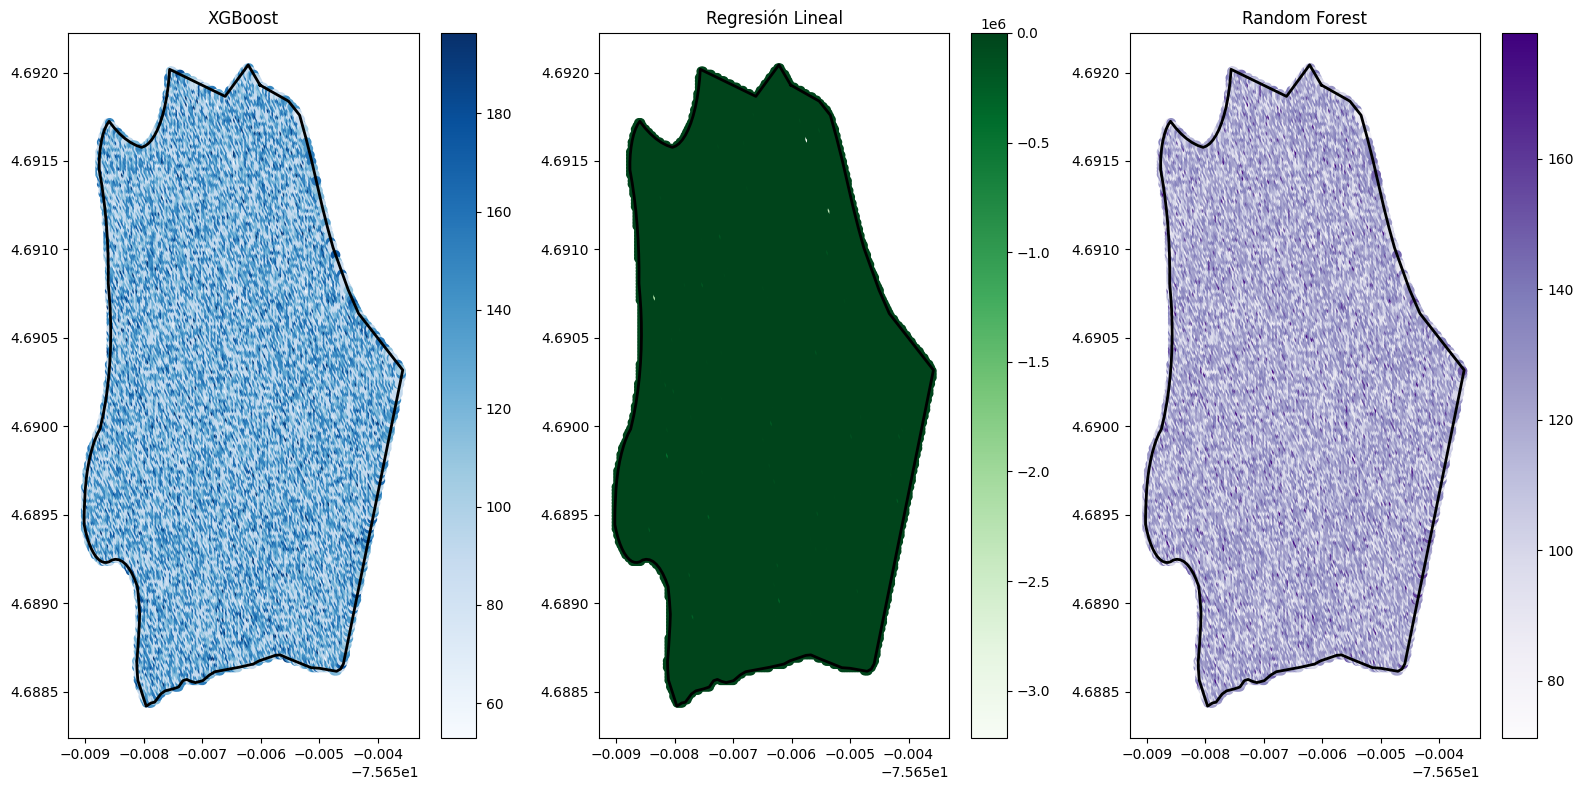

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 1. Definir las coordenadas del polígono
coordenadas = [[-75.6560144622286, 4.69192930066219], [-75.6555792417039, 4.69184792277146], [-75.6555258509746, 4.69183793926211], [-75.655336249554, 4.69175876839367], [-75.6552300335369, 4.69163079251186], [-75.6551291642854, 4.69149853379347], [-75.6550338137726, 4.69136221598133], [-75.6549489827794, 4.69124089074947], [-75.6549487481279, 4.69124057703611], [-75.6548591208862, 4.69112326665706], [-75.6548589020152, 4.69112299802631], [-75.6547643899918, 4.69100955466079], [-75.6545138962908, 4.69077752973122], [-75.6545062951944, 4.69077178700231], [-75.6545041260799, 4.69077014813228], [-75.6544420529584, 4.69072324974622], [-75.654440140035, 4.69072180430928], [-75.6544182398037, 4.69070525807123], [-75.6543288979923, 4.69063775728657], [-75.6540678082047, 4.69052721823367], [-75.653573643749, 4.69031800102348], [-75.6545879033579, 4.68865717817707], [-75.6546362446591, 4.68862786217201], [-75.6547065510611, 4.68861518621853], [-75.6548363595961, 4.68862276514914], [-75.6549964429569, 4.68863211252703], [-75.655139123831, 4.68863562144977], [-75.6555254476252, 4.68868715589648], [-75.6556689039947, 4.68870776606356], [-75.6557522999611, 4.68870524180865], [-75.6560286204176, 4.68867414681087], [-75.6561287491765, 4.68865619670431], [-75.6563683420773, 4.68863824648801], [-75.6567852319587, 4.68861266428247], [-75.6568779235671, 4.68859426951708], [-75.656992355553, 4.68856195978213], [-75.657117515909, 4.68855118963035], [-75.6571961879918, 4.68855836942238], [-75.6572677085099, 4.68856913994768], [-75.6573320768211, 4.68856195991188], [-75.6574071732085, 4.68852605976266], [-75.6575073009857, 4.68851528926892], [-75.657636037566, 4.68850451905728], [-75.6577111337368, 4.68848656934825], [-75.6578154505451, 4.68844048855774], [-75.6578757657446, 4.68843610905951], [-75.657894166683, 4.68843210452508], [-75.6579071518175, 4.68842927778692], [-75.6579121655838, 4.68842818686421], [-75.6579303655041, 4.68842422531379], [-75.6579485654226, 4.6884202646668], [-75.6579610607294, 4.68841861036706], [-75.6579671342961, 4.68842486807232], [-75.6580644080953, 4.6885251374011], [-75.6580965891928, 4.68855794494151], [-75.6581029337193, 4.68856441276097], [-75.6581172378135, 4.68862951142534], [-75.6581200983982, 4.68867067786952], [-75.6581151329923, 4.68868798272674], [-75.6581000437883, 4.68875426018468], [-75.6580823583785, 4.68884881142676], [-75.6580783972939, 4.68887252882326], [-75.6580714049963, 4.68893736814406], [-75.6580860599654, 4.68901120590753], [-75.6581097618446, 4.68909327791134], [-75.6581538583662, 4.68913326763643], [-75.6581539567064, 4.68913335341812], [-75.658202301924, 4.68916798754452], [-75.6582024335922, 4.68916807851677], [-75.6582544699761, 4.68919695421844], [-75.6582545635833, 4.68919700413053], [-75.6583096530626, 4.68921974252512], [-75.6583668605296, 4.68923596171621], [-75.6583669776026, 4.68923599238991], [-75.6584256231195, 4.68924552073523], [-75.6584257798537, 4.68924554365456], [-75.6584851752596, 4.68924826554555], [-75.658485286983, 4.68924826818332], [-75.6585447124517, 4.68924413183219], [-75.658593266054, 4.68923416587721], [-75.6586386126531, 4.68923010789063], [-75.6586840151042, 4.68923096735339], [-75.6586841313285, 4.6892309721097], [-75.6587292004043, 4.68923673919105], [-75.6587292913807, 4.68923675323769], [-75.6587734190464, 4.68924734624377], [-75.6587735670385, 4.68924738511651], [-75.658816445875, 4.68926273742885], [-75.6588578799496, 4.68928290259045], [-75.6588580194669, 4.68928297368987], [-75.6588971441046, 4.68930764377893], [-75.6589332144868, 4.68933635291118], [-75.6589333434192, 4.68933646015037], [-75.6589661952275, 4.68936907389427], [-75.6589951899885, 4.6894049659649], [-75.6589952879458, 4.68940509272853], [-75.6590202893651, 4.68944408294681], [-75.6590204190842, 4.68949187946244], [-75.6590170872486, 4.68953955955882], [-75.6590103105871, 4.68958687014019], [-75.6590019911315, 4.68964053866842], [-75.6590019416165, 4.68964081550346], [-75.6590018899998, 4.68964110318655], [-75.6590018695208, 4.68964120796125], [-75.6590013191414, 4.6896432753196], [-75.6589964233819, 4.68966164166393], [-75.65898774496, 4.6896941990745], [-75.6589877101868, 4.68969431472012], [-75.6589876913591, 4.68969436719272], [-75.6589861642941, 4.6896983390491], [-75.6589780103468, 4.68971954919219], [-75.6589680399829, 4.6897454837403], [-75.6589679862607, 4.68974561290797], [-75.6589650291229, 4.68975138277085], [-75.658953970078, 4.68977296399375], [-75.6589430005886, 4.68979437001562], [-75.6589429243185, 4.6897945099859], [-75.6589381626867, 4.6898017750703], [-75.6589244490068, 4.68982269818723], [-75.6589129035918, 4.68984031393257], [-75.6589128114157, 4.68984044784359], [-75.6589058861147, 4.68984889100784], [-75.6588897601936, 4.68986855352051], [-75.6588780882477, 4.68988278762122], [-75.6588779879981, 4.68988290373655], [-75.6588685886292, 4.68989214827173], [-75.6588503153348, 4.68991012220596], [-75.6588389384606, 4.68992131392844], [-75.6588388539037, 4.68992139301026], [-75.6588266911508, 4.68993103332118], [-75.658806591965, 4.68994696585262], [-75.6587959074735, 4.68995543633344], [-75.6587958515248, 4.68995547810664], [-75.6587952945391, 4.68995584702602], [-75.6587803858839, 4.68996525725519], [-75.6587494760165, 4.68998477039272], [-75.658747620837, 4.68998741966008], [-75.6587192205596, 4.69002796420463], [-75.6587037360445, 4.69005006890346], [-75.6587036667535, 4.6900501736305], [-75.658697504499, 4.69006091247705], [-75.6586774932126, 4.69009578950198], [-75.6586639639767, 4.69011936813031], [-75.658663917552, 4.69011945301516], [-75.6586588138769, 4.69013055863879], [-75.658642005958, 4.69016713241175], [-75.6586305786508, 4.69019199632509], [-75.65863055753, 4.69019204419592], [-75.6586304249655, 4.69019239710224], [-75.6586264757455, 4.69020353972587], [-75.6586131062831, 4.69024125595013], [-75.6586038709539, 4.6902673104276], [-75.6586038512643, 4.69026736641845], [-75.658600892363, 4.69027891666373], [-75.6585909624524, 4.69031767951466], [-75.6585840949797, 4.69034448641954], [-75.6585840268071, 4.69034478099586], [-75.6585821500045, 4.69035635513669], [-75.6585757057234, 4.69039610323424], [-75.658571237196, 4.69042367216465], [-75.6585712331167, 4.69042371417294], [-75.6585704160108, 4.69043523712719], [-75.6585675742506, 4.69047534783056], [-75.6585655857474, 4.69050342095485], [-75.6585658041806, 4.69051483602479], [-75.6585667574112, 4.69056441062902], [-75.6585671205054, 4.69058327582547], [-75.65856712226, 4.6905833400201], [-75.6585676855343, 4.69058848511441], [-75.6585758304733, 4.69066279783772], [-75.6585904084791, 4.69073520346883], [-75.6585904914632, 4.69073560593231], [-75.6586081158155, 4.69080774835324], [-75.6586073483917, 4.6908912243268], [-75.6586073478942, 4.69089132196142], [-75.6586124187731, 4.69097456571168], [-75.6586124319309, 4.69097474292895], [-75.6586233073415, 4.69105737469376], [-75.6586233393224, 4.69105760076706], [-75.6586399671726, 4.6911392407469], [-75.6586400189399, 4.69113948494107], [-75.6586623189016, 4.69121975508695], [-75.6586623869022, 4.69121999208186], [-75.6586902677788, 4.69129854204611], [-75.6586903349872, 4.69129872509875], [-75.6587236704926, 4.6913751791494], [-75.6587237213177, 4.69137529496893], [-75.6587623859737, 4.69144932348116], [-75.6587629763844, 4.69149249950684], [-75.658762972955, 4.69149256470515], [-75.6587566446897, 4.69153523445856], [-75.6587566269196, 4.69153532391581], [-75.6587435526553, 4.69157639771882], [-75.658743517612, 4.69157649829662], [-75.6587240325056, 4.6916149274216], [-75.6587239758277, 4.69161503277695], [-75.6586985770098, 4.69164983163778], [-75.6586985134732, 4.6916499125703], [-75.6586678524145, 4.69168017966245], [-75.6586677958418, 4.69168023288543], [-75.6586326249656, 4.69170519769324], [-75.6585938995653, 4.6917241714766], [-75.6585049636655, 4.69168648083772], [-75.6585047979994, 4.69168641872534], [-75.6584140339161, 4.69165392556581], [-75.6584137766788, 4.69165384639193], [-75.6583214074384, 4.69162661504893], [-75.6583211165465, 4.69162654364158], [-75.6582273798989, 4.69160463516753], [-75.6582270877704, 4.69160458123561], [-75.6581322605047, 4.69158805947448], [-75.6581320812446, 4.69158803620779], [-75.6580363546036, 4.69157693891415], [-75.6579787242805, 4.69158456205124], [-75.6579785716574, 4.6915845852457], [-75.6579220766151, 4.69159861606186], [-75.6579219969803, 4.69159863729537], [-75.6578674545596, 4.69161887826412], [-75.6578673346267, 4.6916189250299], [-75.6578153826523, 4.69164513335961], [-75.6578152632854, 4.69164519730318], [-75.6577664413981, 4.69167711583966], [-75.657721573944, 4.69171420173084], [-75.6577214520916, 4.69171430665212], [-75.6576809653526, 4.69175618915202], [-75.6576808817366, 4.69175627703066], [-75.6576808117389, 4.69175636597992], [-75.6576453522741, 4.6918023517699], [-75.6576452992097, 4.69180242243105], [-75.6576452154841, 4.69180253586754], [-75.6576451210785, 4.69180268659276], [-75.6576150566221, 4.6918522315699], [-75.6576149605104, 4.69185239411695], [-75.657614908067, 4.69185248471489], [-75.6576148005477, 4.69185271013797], [-75.6575904529664, 4.69190524014478], [-75.6575903775136, 4.69190540752585], [-75.6575903337595, 4.6919055083872], [-75.6575902490896, 4.69190575137246], [-75.6575718475415, 4.69196078682217], [-75.6575717975448, 4.69196094786308], [-75.6575717653511, 4.69196108760557], [-75.6575595281818, 4.69201811262632], [-75.6568396331683, 4.69190205344565], [-75.6566102778585, 4.69186507723352], [-75.6565015474739, 4.69191411842344], [-75.6562154846527, 4.6920431425841], [-75.6560144622286, 4.69192930066219]]

# Crear el polígono usando shapely
poligono = Polygon(coordenadas)

# Definir el número de puntos a generar en la malla
num_puntos = 200

# Generar una malla de puntos dentro del bounding box del polígono
longitudes = np.linspace(min([p[0] for p in coordenadas]), max([p[0] for p in coordenadas]), num_puntos)
latitudes = np.linspace(min([p[1] for p in coordenadas]), max([p[1] for p in coordenadas]), num_puntos)
puntos_malla = [(lon, lat) for lon in longitudes for lat in latitudes if poligono.contains(Point(lon, lat))]

# 2. Cargar los datos de entrenamiento y preparar las características
dataframemg = dataframemg
dataframemg = dataframemg.dropna()

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Entrenar los modelos
# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 4. Predecir la biomasa en la malla de puntos
predicciones_xgb = []
predicciones_lr = []
predicciones_rf = []

for punto in puntos_malla:
    # Generar valores de NDVI, DAP, y altura para cada punto (ejemplo con valores aleatorios, ajusta esto)
    ndvi = np.random.rand()  # Aquí deberías calcular el valor real del NDVI para el punto
    dap = np.random.rand() * 30  # Un ejemplo de DAP en cm
    altura = np.random.rand() * 20  # Un ejemplo de altura en metros

    # Crear un array con las características necesarias
    caracteristicas = scaler.transform([[ndvi, dap, altura, ndvi / dap, altura * ndvi]])

    # Hacer predicciones usando los modelos
    predicciones_xgb.append(xgb_model.predict(caracteristicas)[0])
    predicciones_lr.append(lr_model.predict(caracteristicas)[0])
    predicciones_rf.append(rf_model.predict(caracteristicas)[0])

# 5. Graficar cada polígono con las predicciones de cada modelo

# Crear subplots para cada modelo
fig, axs = plt.subplots(1, 3, figsize=(16, 8))

# Graficar el polígono y las predicciones de XGBoost
axs[0].plot(longitudes_poligono, latitudes_poligono, linestyle='-', color='black', linewidth=2)
sc = axs[0].scatter([p[0] for p in puntos_malla], [p[1] for p in puntos_malla], c=predicciones_xgb, cmap='Blues')
axs[0].set_title('XGBoost')
fig.colorbar(sc, ax=axs[0])

# Graficar el polígono y las predicciones de Regresión Lineal
axs[1].plot(longitudes_poligono, latitudes_poligono, linestyle='-', color='black', linewidth=2)
sc = axs[1].scatter([p[0] for p in puntos_malla], [p[1] for p in puntos_malla], c=predicciones_lr, cmap='Greens')
axs[1].set_title('Regresión Lineal')
fig.colorbar(sc, ax=axs[1])

# Graficar el polígono y las predicciones de Random Forest
axs[2].plot(longitudes_poligono, latitudes_poligono, linestyle='-', color='black', linewidth=2)
sc = axs[2].scatter([p[0] for p in puntos_malla], [p[1] for p in puntos_malla], c=predicciones_rf, cmap='Purples')
axs[2].set_title('Random Forest')
fig.colorbar(sc, ax=axs[2])

# Ajustar el layout
plt.tight_layout()
plt.show()


Este código genera un polígono definido por coordenadas GPS, luego crea una malla de puntos dentro de este polígono y utiliza tres modelos de machine learning (XGBoost, Regresión Lineal, y Random Forest) para predecir la biomasa (Mg/ha) en cada punto de la malla. Las predicciones de biomasa se basan en características como el NDVI, diámetro a la altura del pecho (DAP), y la altura de los árboles.

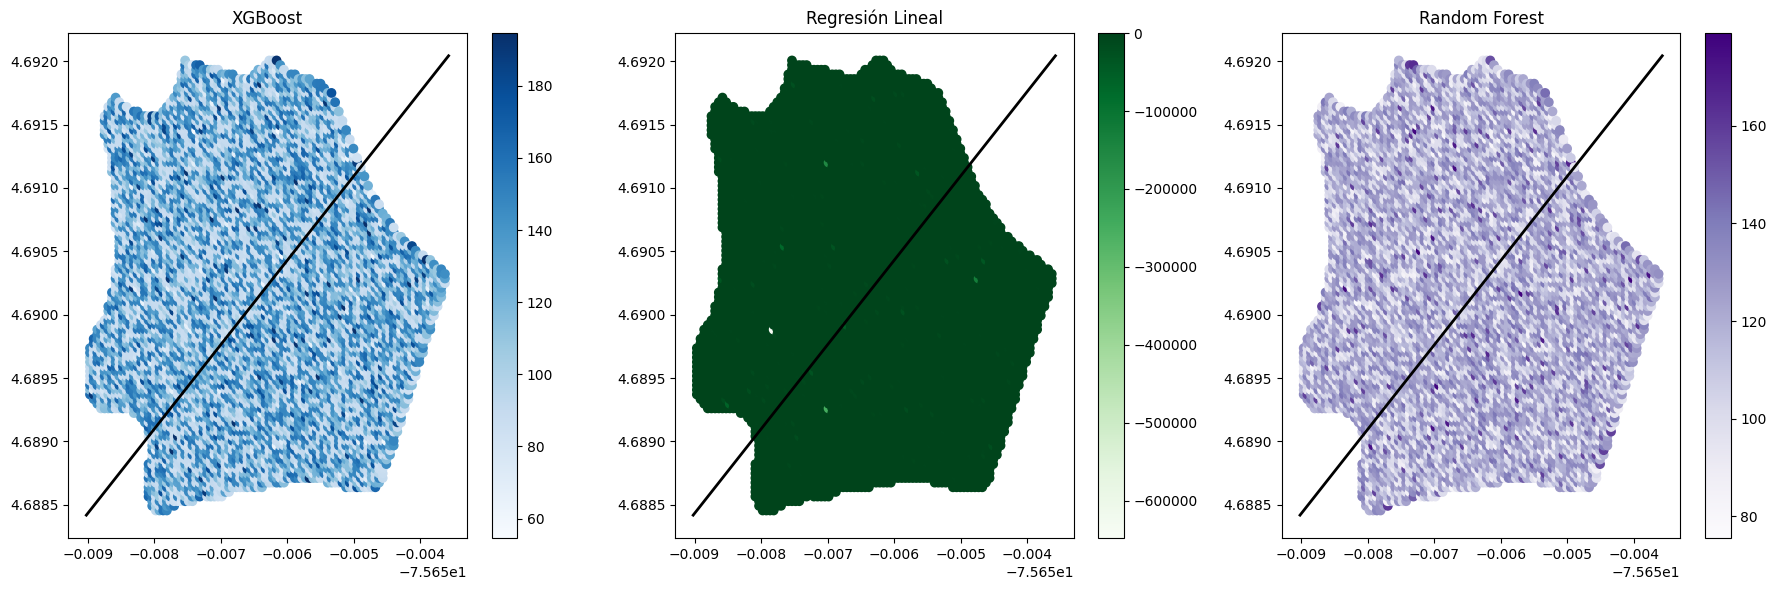

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 1. Definir las coordenadas del polígono
coordenadas = [[-75.6560144622286, 4.69192930066219], [-75.6555792417039, 4.69184792277146], [-75.6555258509746, 4.69183793926211], [-75.655336249554, 4.69175876839367], [-75.6552300335369, 4.69163079251186], [-75.6551291642854, 4.69149853379347], [-75.6550338137726, 4.69136221598133], [-75.6549489827794, 4.69124089074947], [-75.6549487481279, 4.69124057703611], [-75.6548591208862, 4.69112326665706], [-75.6548589020152, 4.69112299802631], [-75.6547643899918, 4.69100955466079], [-75.6545138962908, 4.69077752973122], [-75.6545062951944, 4.69077178700231], [-75.6545041260799, 4.69077014813228], [-75.6544420529584, 4.69072324974622], [-75.654440140035, 4.69072180430928], [-75.6544182398037, 4.69070525807123], [-75.6543288979923, 4.69063775728657], [-75.6540678082047, 4.69052721823367], [-75.653573643749, 4.69031800102348], [-75.6545879033579, 4.68865717817707], [-75.6546362446591, 4.68862786217201], [-75.6547065510611, 4.68861518621853], [-75.6548363595961, 4.68862276514914], [-75.6549964429569, 4.68863211252703], [-75.655139123831, 4.68863562144977], [-75.6555254476252, 4.68868715589648], [-75.6556689039947, 4.68870776606356], [-75.6557522999611, 4.68870524180865], [-75.6560286204176, 4.68867414681087], [-75.6561287491765, 4.68865619670431], [-75.6563683420773, 4.68863824648801], [-75.6567852319587, 4.68861266428247], [-75.6568779235671, 4.68859426951708], [-75.656992355553, 4.68856195978213], [-75.657117515909, 4.68855118963035], [-75.6571961879918, 4.68855836942238], [-75.6572677085099, 4.68856913994768], [-75.6573320768211, 4.68856195991188], [-75.6574071732085, 4.68852605976266], [-75.6575073009857, 4.68851528926892], [-75.657636037566, 4.68850451905728], [-75.6577111337368, 4.68848656934825], [-75.6578154505451, 4.68844048855774], [-75.6578757657446, 4.68843610905951], [-75.657894166683, 4.68843210452508], [-75.6579071518175, 4.68842927778692], [-75.6579121655838, 4.68842818686421], [-75.6579303655041, 4.68842422531379], [-75.6579485654226, 4.6884202646668], [-75.6579610607294, 4.68841861036706], [-75.6579671342961, 4.68842486807232], [-75.6580644080953, 4.6885251374011], [-75.6580965891928, 4.68855794494151], [-75.6581029337193, 4.68856441276097], [-75.6581172378135, 4.68862951142534], [-75.6581200983982, 4.68867067786952], [-75.6581151329923, 4.68868798272674], [-75.6581000437883, 4.68875426018468], [-75.6580823583785, 4.68884881142676], [-75.6580783972939, 4.68887252882326], [-75.6580714049963, 4.68893736814406], [-75.6580860599654, 4.68901120590753], [-75.6581097618446, 4.68909327791134], [-75.6581538583662, 4.68913326763643], [-75.6581539567064, 4.68913335341812], [-75.658202301924, 4.68916798754452], [-75.6582024335922, 4.68916807851677], [-75.6582544699761, 4.68919695421844], [-75.6582545635833, 4.68919700413053], [-75.6583096530626, 4.68921974252512], [-75.6583668605296, 4.68923596171621], [-75.6583669776026, 4.68923599238991], [-75.6584256231195, 4.68924552073523], [-75.6584257798537, 4.68924554365456], [-75.6584851752596, 4.68924826554555], [-75.658485286983, 4.68924826818332], [-75.6585447124517, 4.68924413183219], [-75.658593266054, 4.68923416587721], [-75.6586386126531, 4.68923010789063], [-75.6586840151042, 4.68923096735339], [-75.6586841313285, 4.6892309721097], [-75.6587292004043, 4.68923673919105], [-75.6587292913807, 4.68923675323769], [-75.6587734190464, 4.68924734624377], [-75.6587735670385, 4.68924738511651], [-75.658816445875, 4.68926273742885], [-75.6588578799496, 4.68928290259045], [-75.6588580194669, 4.68928297368987], [-75.6588971441046, 4.68930764377893], [-75.6589332144868, 4.68933635291118], [-75.6589333434192, 4.68933646015037], [-75.6589661952275, 4.68936907389427], [-75.6589951899885, 4.6894049659649], [-75.6589952879458, 4.68940509272853], [-75.6590202893651, 4.68944408294681], [-75.6590204190842, 4.68949187946244], [-75.6590170872486, 4.68953955955882], [-75.6590103105871, 4.68958687014019], [-75.6590019911315, 4.68964053866842], [-75.6590019416165, 4.68964081550346], [-75.6590018899998, 4.68964110318655], [-75.6590018695208, 4.68964120796125], [-75.6590013191414, 4.6896432753196], [-75.6589964233819, 4.68966164166393], [-75.65898774496, 4.6896941990745], [-75.6589877101868, 4.68969431472012], [-75.6589876913591, 4.68969436719272], [-75.6589861642941, 4.6896983390491], [-75.6589780103468, 4.68971954919219], [-75.6589680399829, 4.6897454837403], [-75.6589679862607, 4.68974561290797], [-75.6589650291229, 4.68975138277085], [-75.658953970078, 4.68977296399375], [-75.6589430005886, 4.68979437001562], [-75.6589429243185, 4.6897945099859], [-75.6589381626867, 4.6898017750703], [-75.6589244490068, 4.68982269818723], [-75.6589129035918, 4.68984031393257], [-75.6589128114157, 4.68984044784359], [-75.6589058861147, 4.68984889100784], [-75.6588897601936, 4.68986855352051], [-75.6588780882477, 4.68988278762122], [-75.6588779879981, 4.68988290373655], [-75.6588685886292, 4.68989214827173], [-75.6588503153348, 4.68991012220596], [-75.6588389384606, 4.68992131392844], [-75.6588388539037, 4.68992139301026], [-75.6588266911508, 4.68993103332118], [-75.658806591965, 4.68994696585262], [-75.6587959074735, 4.68995543633344], [-75.6587958515248, 4.68995547810664], [-75.6587952945391, 4.68995584702602], [-75.6587803858839, 4.68996525725519], [-75.6587494760165, 4.68998477039272], [-75.658747620837, 4.68998741966008], [-75.6587192205596, 4.69002796420463], [-75.6587037360445, 4.69005006890346], [-75.6587036667535, 4.6900501736305], [-75.658697504499, 4.69006091247705], [-75.6586774932126, 4.69009578950198], [-75.6586639639767, 4.69011936813031], [-75.658663917552, 4.69011945301516], [-75.6586588138769, 4.69013055863879], [-75.658642005958, 4.69016713241175], [-75.6586305786508, 4.69019199632509], [-75.65863055753, 4.69019204419592], [-75.6586304249655, 4.69019239710224], [-75.6586264757455, 4.69020353972587], [-75.6586131062831, 4.69024125595013], [-75.6586038709539, 4.6902673104276], [-75.6586038512643, 4.69026736641845], [-75.658600892363, 4.69027891666373], [-75.6585909624524, 4.69031767951466], [-75.6585840949797, 4.69034448641954], [-75.6585840268071, 4.69034478099586], [-75.6585821500045, 4.69035635513669], [-75.6585757057234, 4.69039610323424], [-75.658571237196, 4.69042367216465], [-75.6585712331167, 4.69042371417294], [-75.6585704160108, 4.69043523712719], [-75.6585675742506, 4.69047534783056], [-75.6585655857474, 4.69050342095485], [-75.6585658041806, 4.69051483602479], [-75.6585667574112, 4.69056441062902], [-75.6585671205054, 4.69058327582547], [-75.65856712226, 4.6905833400201], [-75.6585676855343, 4.69058848511441], [-75.6585758304733, 4.69066279783772], [-75.6585904084791, 4.69073520346883], [-75.6585904914632, 4.69073560593231], [-75.6586081158155, 4.69080774835324], [-75.6586073483917, 4.6908912243268], [-75.6586073478942, 4.69089132196142], [-75.6586124187731, 4.69097456571168], [-75.6586124319309, 4.69097474292895], [-75.6586233073415, 4.69105737469376], [-75.6586233393224, 4.69105760076706], [-75.6586399671726, 4.6911392407469], [-75.6586400189399, 4.69113948494107], [-75.6586623189016, 4.69121975508695], [-75.6586623869022, 4.69121999208186], [-75.6586902677788, 4.69129854204611], [-75.6586903349872, 4.69129872509875], [-75.6587236704926, 4.6913751791494], [-75.6587237213177, 4.69137529496893], [-75.6587623859737, 4.69144932348116], [-75.6587629763844, 4.69149249950684], [-75.658762972955, 4.69149256470515], [-75.6587566446897, 4.69153523445856], [-75.6587566269196, 4.69153532391581], [-75.6587435526553, 4.69157639771882], [-75.658743517612, 4.69157649829662], [-75.6587240325056, 4.6916149274216], [-75.6587239758277, 4.69161503277695], [-75.6586985770098, 4.69164983163778], [-75.6586985134732, 4.6916499125703], [-75.6586678524145, 4.69168017966245], [-75.6586677958418, 4.69168023288543], [-75.6586326249656, 4.69170519769324], [-75.6585938995653, 4.6917241714766], [-75.6585049636655, 4.69168648083772], [-75.6585047979994, 4.69168641872534], [-75.6584140339161, 4.69165392556581], [-75.6584137766788, 4.69165384639193], [-75.6583214074384, 4.69162661504893], [-75.6583211165465, 4.69162654364158], [-75.6582273798989, 4.69160463516753], [-75.6582270877704, 4.69160458123561], [-75.6581322605047, 4.69158805947448], [-75.6581320812446, 4.69158803620779], [-75.6580363546036, 4.69157693891415], [-75.6579787242805, 4.69158456205124], [-75.6579785716574, 4.6915845852457], [-75.6579220766151, 4.69159861606186], [-75.6579219969803, 4.69159863729537], [-75.6578674545596, 4.69161887826412], [-75.6578673346267, 4.6916189250299], [-75.6578153826523, 4.69164513335961], [-75.6578152632854, 4.69164519730318], [-75.6577664413981, 4.69167711583966], [-75.657721573944, 4.69171420173084], [-75.6577214520916, 4.69171430665212], [-75.6576809653526, 4.69175618915202], [-75.6576808817366, 4.69175627703066], [-75.6576808117389, 4.69175636597992], [-75.6576453522741, 4.6918023517699], [-75.6576452992097, 4.69180242243105], [-75.6576452154841, 4.69180253586754], [-75.6576451210785, 4.69180268659276], [-75.6576150566221, 4.6918522315699], [-75.6576149605104, 4.69185239411695], [-75.657614908067, 4.69185248471489], [-75.6576148005477, 4.69185271013797], [-75.6575904529664, 4.69190524014478], [-75.6575903775136, 4.69190540752585], [-75.6575903337595, 4.6919055083872], [-75.6575902490896, 4.69190575137246], [-75.6575718475415, 4.69196078682217], [-75.6575717975448, 4.69196094786308], [-75.6575717653511, 4.69196108760557], [-75.6575595281818, 4.69201811262632], [-75.6568396331683, 4.69190205344565], [-75.6566102778585, 4.69186507723352], [-75.6565015474739, 4.69191411842344], [-75.6562154846527, 4.6920431425841], [-75.6560144622286, 4.69192930066219]]

# Crear el polígono usando shapely
poligono = Polygon(coordenadas)

# Definir el número de puntos a generar en la malla
num_puntos = 100

# Generar una malla de puntos dentro del bounding box del polígono
longitudes = np.linspace(min([p[0] for p in coordenadas]), max([p[0] for p in coordenadas]), num_puntos)
latitudes = np.linspace(min([p[1] for p in coordenadas]), max([p[1] for p in coordenadas]), num_puntos)
puntos_malla = [(lon, lat) for lon in longitudes for lat in latitudes if poligono.contains(Point(lon, lat))]

# 2. Cargar los datos de entrenamiento y preparar las características
dataframemg = dataframemg
dataframemg = dataframemg.dropna()

# Ingeniería de características
dataframemg['NDVI_DAP'] = dataframemg['NDVI'] / dataframemg['Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt']
dataframemg['HT_NDVI'] = dataframemg['HT altura del árbol o del fuste 1 (mt)'] * dataframemg['NDVI']

# Seleccionar características
numeric_features = ['NDVI', 'Diametro 1 Altura del Pecho DAP (cm)  fuste 1 tomar como parámetro 1,3 mt', 'HT altura del árbol o del fuste 1 (mt)', 'NDVI_DAP', 'HT_NDVI']
X = dataframemg[numeric_features]
y = dataframemg['Biomasa (Mg/ha)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Entrenar los modelos
# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 4. Predecir la biomasa en la malla de puntos
predicciones_xgb = []
predicciones_lr = []
predicciones_rf = []

for punto in puntos_malla:
    # Generar valores de NDVI, DAP, y altura para cada punto (ejemplo con valores aleatorios, ajusta esto)
    ndvi = np.random.rand()  # Aquí deberías calcular el valor real del NDVI para el punto
    dap = np.random.rand() * 30  # Un ejemplo de DAP en cm
    altura = np.random.rand() * 20  # Un ejemplo de altura en metros

    # Crear un array con las características necesarias
    caracteristicas = scaler.transform([[ndvi, dap, altura, ndvi / dap, altura * ndvi]])

    # Hacer predicciones usando los modelos
    predicciones_xgb.append(xgb_model.predict(caracteristicas)[0])
    predicciones_lr.append(lr_model.predict(caracteristicas)[0])
    predicciones_rf.append(rf_model.predict(caracteristicas)[0])

# 5. Graficar cada polígono con las predicciones de cada modelo

# Crear subplots para cada modelo
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Graficar el polígono y las predicciones de XGBoost
axs[0].plot(longitudes, latitudes, linestyle='-', color='black', linewidth=2)
sc = axs[0].scatter([p[0] for p in puntos_malla], [p[1] for p in puntos_malla], c=predicciones_xgb, cmap='Blues')
axs[0].set_title('XGBoost')
fig.colorbar(sc, ax=axs[0])

# Graficar el polígono y las predicciones de Regresión Lineal
axs[1].plot(longitudes, latitudes, linestyle='-', color='black', linewidth=2)
sc = axs[1].scatter([p[0] for p in puntos_malla], [p[1] for p in puntos_malla], c=predicciones_lr, cmap='Greens')
axs[1].set_title('Regresión Lineal')
fig.colorbar(sc, ax=axs[1])

# Graficar el polígono y las predicciones de Random Forest
axs[2].plot(longitudes, latitudes, linestyle='-', color='black', linewidth=2)
sc = axs[2].scatter([p[0] for p in puntos_malla], [p[1] for p in puntos_malla], c=predicciones_rf, cmap='Purples')
axs[2].set_title('Random Forest')
fig.colorbar(sc, ax=axs[2])

# Ajustar el layout
plt.tight_layout()
plt.show()


Al analizar los gráficos generados por los modelos **XGBoost**, **Regresión Lineal**, y **Random Forest** para la predicción de biomasa dentro del polígono, se observan los siguientes resultados:

### 1. **XGBoost**:
   - **Color**: El color azul representa las predicciones de biomasa. El gradiente de color va de claro a oscuro, donde los valores más oscuros indican una mayor biomasa.
   - **Observaciones**: Las predicciones de **XGBoost** parecen variar a lo largo del polígono, con una distribución razonablemente uniforme. Las diferencias en la predicción son notables en todo el polígono, lo que sugiere que **XGBoost** está capturando algunas variaciones en los datos, aunque estas predicciones parecen algo dispersas.

### 2. **Regresión Lineal**:
   - **Color**: El gráfico de Regresión Lineal tiene un color verde oscuro, pero la escala de valores parece estar mal ajustada, lo que resulta en predicciones negativas extremadamente grandes, lo que es claramente incorrecto.
   - **Observaciones**: Esto sugiere que el modelo de Regresión Lineal no está capturando bien las relaciones entre las características y la biomasa, lo que provoca predicciones de biomasa que no son razonables (incluso negativas, lo cual no es posible para la biomasa).

### 3. **Random Forest**:
   - **Color**: Las predicciones están representadas con un color morado, y al igual que con XGBoost, las diferencias de predicción de biomasa están distribuidas de manera más uniforme dentro del polígono.
   - **Observaciones**: Las predicciones de **Random Forest** parecen razonablemente bien distribuidas, con valores que varían dentro del polígono. La dispersión y la variabilidad dentro del polígono sugieren que el modelo está capturando mejor algunas diferencias en la biomasa.

### **Comparación General**:
   - **XGBoost** y **Random Forest** muestran variaciones claras en las predicciones dentro del polígono, mientras que **Regresión Lineal** claramente falla con predicciones fuera de rango (posiblemente negativas).
   - **XGBoost** y **Random Forest** parecen ser más robustos y capturan mejor la variabilidad en los datos, mientras que la Regresión Lineal no parece adecuada para este tipo de predicción en este caso específico.

### **Conclusión**:
   - **Random Forest** y **XGBoost** parecen ser más adecuados para predecir la biomasa en este caso, mientras que la **Regresión Lineal** no es adecuada, ya que genera valores irreales. Sería recomendable revisar el ajuste del modelo de Regresión Lineal o probar con más datos o características adicionales.